In [1]:
import sys
sys.path.insert(0, "/wd/lut_reproduce/src/")
import torch 
import torch.nn as nn

In [2]:
from models.srnet import SRNet
m = SRNet()
m

SRNet(
  (stage1_S): UpscaleBlock(
    (stage): LinearUpscaleBlockNet(
      (embed): Linear(in_features=4, out_features=64, bias=True)
      (linear_projections): ModuleList(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): Linear(in_features=128, out_features=64, bias=True)
        (2): Linear(in_features=192, out_features=64, bias=True)
        (3): Linear(in_features=256, out_features=64, bias=True)
      )
      (project_channels): Linear(in_features=320, out_features=16, bias=True)
    )
  )
)

In [3]:
from models import SaveCheckpoint, LoadCheckpoint
SaveCheckpoint(m, "test_net.pth")
m = LoadCheckpoint("test_net.pth")
m

{'model': 'SRNet', 'state_dict': OrderedDict([('stage1_S.stage.embed.weight', tensor([[-0.0253, -0.4412, -0.0024,  0.2879],
        [-0.4040,  0.4668, -0.4595, -0.2025],
        [ 0.4482,  0.3149,  0.3542,  0.1291],
        [-0.4060, -0.0809, -0.2587, -0.3048],
        [ 0.1974, -0.3897, -0.0906,  0.2352],
        [ 0.2794, -0.1026,  0.0138, -0.2727],
        [ 0.3783,  0.1517,  0.3843, -0.4109],
        [-0.3406,  0.3860, -0.4475, -0.1571],
        [-0.3769,  0.3830, -0.3000,  0.2455],
        [-0.4775, -0.1346, -0.0637,  0.2347],
        [-0.1363,  0.3854, -0.1956, -0.2955],
        [-0.3117,  0.0876, -0.1226, -0.4492],
        [-0.1892, -0.3556,  0.3783, -0.2503],
        [-0.3045,  0.0499, -0.0771,  0.4266],
        [ 0.2473,  0.3793,  0.0359,  0.0251],
        [ 0.3619, -0.1112,  0.3312, -0.4303],
        [-0.4009,  0.2448, -0.0599,  0.3132],
        [-0.0767, -0.4169,  0.0757,  0.2411],
        [ 0.0737, -0.3395,  0.1832,  0.3778],
        [-0.2745,  0.0727,  0.0867,  0.2240],
  

SRNet(
  (stage1_S): UpscaleBlock(
    (stage): LinearUpscaleBlockNet(
      (embed): Linear(in_features=4, out_features=64, bias=True)
      (linear_projections): ModuleList(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): Linear(in_features=128, out_features=64, bias=True)
        (2): Linear(in_features=192, out_features=64, bias=True)
        (3): Linear(in_features=256, out_features=64, bias=True)
      )
      (project_channels): Linear(in_features=320, out_features=16, bias=True)
    )
  )
)

In [4]:
m = m.get_lut_model()
m

stage1_S
 LinearUpscaleBlockNet 83521/83521    


SRNet(
  (stage1_S): UpscaleBlock(
    (stage): LinearUpscaleBlockLut
      lut size: torch.Size([17, 17, 17, 17, 4, 4])
  )
)

In [5]:
m.state_dict()

OrderedDict([('stage1_S.stage.stage',
              tensor([[[[[[121., 133., 118., 138.],
                          [118., 128., 125., 109.],
                          [124., 114., 140., 120.],
                          [101., 129., 112., 127.]],
              
                         [[120., 133., 119., 137.],
                          [119., 129., 125., 109.],
                          [123., 114., 138., 121.],
                          [101., 129., 112., 127.]],
              
                         [[120., 134., 119., 135.],
                          [120., 129., 125., 109.],
                          [123., 114., 136., 122.],
                          [101., 129., 112., 127.]],
              
                         ...,
              
                         [[114., 142., 119., 126.],
                          [123., 136., 126., 111.],
                          [120., 103., 117., 132.],
                          [103., 127., 109., 137.]],
              
                     

In [6]:
SaveCheckpoint(m, "test_lut.pth")
m = LoadCheckpoint("test_lut.pth")

{'model': 'SRNet', 'state_dict': OrderedDict([('stage1_S.stage.stage', tensor([[[[[[121., 133., 118., 138.],
            [118., 128., 125., 109.],
            [124., 114., 140., 120.],
            [101., 129., 112., 127.]],

           [[120., 133., 119., 137.],
            [119., 129., 125., 109.],
            [123., 114., 138., 121.],
            [101., 129., 112., 127.]],

           [[120., 134., 119., 135.],
            [120., 129., 125., 109.],
            [123., 114., 136., 122.],
            [101., 129., 112., 127.]],

           ...,

           [[114., 142., 119., 126.],
            [123., 136., 126., 111.],
            [120., 103., 117., 132.],
            [103., 127., 109., 137.]],

           [[113., 142., 119., 125.],
            [123., 137., 126., 112.],
            [120., 102., 115., 132.],
            [103., 127., 108., 139.]],

           [[113., 143., 118., 125.],
            [122., 138., 127., 112.],
            [120., 100., 114., 133.],
            [103., 126., 108

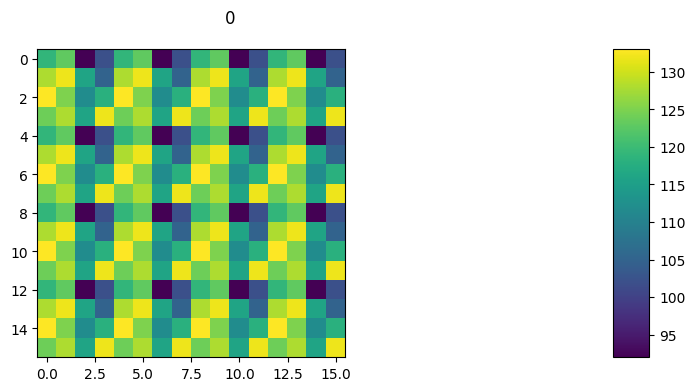

In [8]:
imshow(m(torch.zeros((1,1,4,4))))

In [5]:
from common.layers import UpscaleBlock

In [3]:
bb = UpscaleBlock()
bb

UpscaleBlock(
  (embed): Linear(in_features=4, out_features=32, bias=True)
  (linear_projections): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=96, out_features=32, bias=True)
    (3): Linear(in_features=128, out_features=32, bias=True)
  )
  (project_channels): Linear(in_features=160, out_features=1, bias=True)
)

In [4]:
bb.quantize()
bb

 UpscaleBlock 83521/83521    


UpscaleBlockLUT (
  lut: torch.Size([17, 17, 17, 17, 1, 1])
)

In [6]:
bb.quantize()
bb

UpscaleBlockLUT (
  lut: torch.Size([17, 17, 17, 17, 1, 1])
)

In [4]:
bb(torch.zeros((1,1,4)))

NameError: name 'bb' is not defined

In [12]:
import numpy as np
np.prod(bb.lut.shape[:4])

83521

In [17]:
import torch
isinstance(bb.lut, torch.nn.Parameter)
[f"  {name} {param.shape}" for name, param in bb.state_dict().items() if 'lut' in name]

['  lut torch.Size([17, 17, 17, 17, 1, 1])']

In [4]:
from PIL import Image
import numpy as np

def PSNR(y_true, y_pred, shave_border=4):
    target_data = np.array(y_true, dtype=np.float32)
    ref_data = np.array(y_pred, dtype=np.float32)

    diff = ref_data - target_data
    if shave_border > 0:
        diff = diff[shave_border:-shave_border, shave_border:-shave_border]
    rmse = np.sqrt(np.mean(np.power(diff, 2)))

    return 20 * np.log10(255. / rmse)

def _rgb2ycbcr(img, maxVal=255):
    O = np.array([[16],
                  [128],
                  [128]])
    T = np.array([[0.256788235294118, 0.504129411764706, 0.097905882352941],
                  [-0.148223529411765, -0.290992156862745, 0.439215686274510],
                  [0.439215686274510, -0.367788235294118, -0.071427450980392]])

    if maxVal == 1:
        O = O / 255.0

    t = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
    t = np.dot(t, np.transpose(T))
    t[:, 0] += O[0]
    t[:, 1] += O[1]
    t[:, 2] += O[2]
    ycbcr = np.reshape(t, [img.shape[0], img.shape[1], img.shape[2]])

    return ycbcr

image = np.array(Image.open("./data/Set14/HR/monarch.png"))
np.random.seed(2)
noise = np.random.randint(-5,5,size=image.shape)

def with_noise(image, noise):
    return (image + noise).clip(0,255).astype(np.uint8)

a = _rgb2ycbcr(image)[:,:,0]
b = _rgb2ycbcr(with_noise(image, noise))[:,:,0]

image = np.array(Image.open("./data/Set14/HR/monarch.png").convert("YCbCr").getchannel(0))
c = image
d = with_noise(image, noise[:,:,0])

image = np.array(Image.open("./data/Set14/HR/monarch.png"))
y = _rgb2ycbcr(image)[:,:,0]
e = y
f = with_noise(y, noise[:,:,0])

noise_before_rgb2y = PSNR(a, b)
noise_after_pil_rgb2y = PSNR(c, d)
noise_after_mutlut_rgb2y = PSNR(e, f)

# 43.49568901720914, 38.837762584624734, 38.445220463904704
noise_before_rgb2y, noise_after_pil_rgb2y, noise_after_mutlut_rgb2y

(43.49568901720914, 38.837762584624734, 38.445220463904704)

In [219]:
217728*2*2, 3*1*126*192*2*2

(870912, 290304)

In [220]:
torch.arange(start=0, end=256, step=16)

NameError: name 'torch' is not defined

In [6]:
import torch
import torch.nn.functional as F
n = 4
a = (torch.arange(n**2) + torch.arange(start=0, end=16**2, step=16)).view(1,1,n,n).type(torch.float32)

def bit_plane_slicing(x, bit_mask='11110000'):
    m = int(bit_mask, 2)
    masks = [m, 255-m]
    msb = (x.type(torch.LongTensor) & m).type(torch.FloatTensor).to(x.device)
    lsb = (x.type(torch.LongTensor) & (255-m)).type(torch.FloatTensor).to(x.device)
    return msb, lsb

def bit_plane_slicing2(x):
    lsb = a % 16
    msb = a - lsb
    return msb, lsb

bit_plane_slicing(a), bit_plane_slicing2(a)

((tensor([[[[  0.,  16.,  32.,  48.],
            [ 64.,  80.,  96., 112.],
            [128., 144., 160., 176.],
            [192., 208., 224., 240.]]]]),
  tensor([[[[ 0.,  1.,  2.,  3.],
            [ 4.,  5.,  6.,  7.],
            [ 8.,  9., 10., 11.],
            [12., 13., 14., 15.]]]])),
 (tensor([[[[  0.,  16.,  32.,  48.],
            [ 64.,  80.,  96., 112.],
            [128., 144., 160., 176.],
            [192., 208., 224., 240.]]]]),
  tensor([[[[ 0.,  1.,  2.,  3.],
            [ 4.,  5.,  6.,  7.],
            [ 8.,  9., 10., 11.],
            [12., 13., 14., 15.]]]])))

In [ ]:
n = 4000
a = (torch.arange(n**2) + torch.arange(start=0, end=16**2, step=16)).view(1,1,n,n).type(torch.float32)

In [7]:
%%timeit
bit_plane_slicing(a)

36.3 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%%timeit
bit_plane_slicing2(a)

11 µs ± 242 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
lsb = a % 16
msb = a - lsb
msb, lsb

(tensor([[[[  0.,  16.,  32.,  48.],
           [ 64.,  80.,  96., 112.],
           [128., 144., 160., 176.],
           [192., 208., 224., 240.]]]]),
 tensor([[[[ 0.,  1.,  2.,  3.],
           [ 4.,  5.,  6.,  7.],
           [ 8.,  9., 10., 11.],
           [12., 13., 14., 15.]]]]))

In [ ]:
# sys.path.insert(0, "/wd/luts/src/")
import numpy as np
from models import SaveCheckpoint
from models.sdylut import SDYLutR90x2
from pathlib import Path
path1s = Path("/wd/MuLUT/models/sr_x2sdy/LUT_ft_x4_4bit_int8_s1_s.npy")
path1d = Path("/wd/MuLUT/models/sr_x2sdy/LUT_ft_x4_4bit_int8_s1_d.npy")
path1y = Path("/wd/MuLUT/models/sr_x2sdy/LUT_ft_x4_4bit_int8_s1_y.npy")
path2s = Path("/wd/MuLUT/models/sr_x2sdy/LUT_ft_x4_4bit_int8_s2_s.npy")
path2d = Path("/wd/MuLUT/models/sr_x2sdy/LUT_ft_x4_4bit_int8_s2_d.npy")
path2y = Path("/wd/MuLUT/models/sr_x2sdy/LUT_ft_x4_4bit_int8_s2_y.npy")
lut1s = np.load(path1s).reshape(17,17,17,17,1,1).astype(np.int8) 
lut1s = np.flip(lut1s, axis=[0,2]).copy()
lut1d = np.load(path1d).reshape(17,17,17,17,1,1).astype(np.int8) 
lut1d = np.flip(lut1d, axis=[0,2]).copy()
lut1y = np.load(path1y).reshape(17,17,17,17,1,1).astype(np.int8) 
lut1y = np.flip(lut1y, axis=[0,2]).copy()
lut2s = np.load(path2s).reshape(17,17,17,17,4,4).astype(np.int8) 
lut2s = np.flip(lut2s, axis=[0,2]).copy()
lut2d = np.load(path2d).reshape(17,17,17,17,4,4).astype(np.int8) 
lut2d = np.flip(lut2d, axis=[0,2]).copy()
lut2y = np.load(path2y).reshape(17,17,17,17,4,4).astype(np.int8) 
lut2y = np.flip(lut2y, axis=[0,2]).copy()
m = SDYLutR90x2.init_from_numpy(stage1_S=lut1s, stage1_D=lut1d, stage1_Y=lut1y, stage2_S=lut2s, stage2_D=lut2d, stage2_Y=lut2y)
SaveCheckpoint(model=m, path=f"./models/MuLUT_ft_x4_4bit_int8.pt")
m


SDYLutR90x2
  stage1_S size: torch.Size([17, 17, 17, 17, 1, 1])
  stage1_D size: torch.Size([17, 17, 17, 17, 1, 1])
  stage1_Y size: torch.Size([17, 17, 17, 17, 1, 1])
  stage2_S size: torch.Size([17, 17, 17, 17, 4, 4])
  stage2_D size: torch.Size([17, 17, 17, 17, 4, 4])
  stage2_Y size: torch.Size([17, 17, 17, 17, 4, 4])

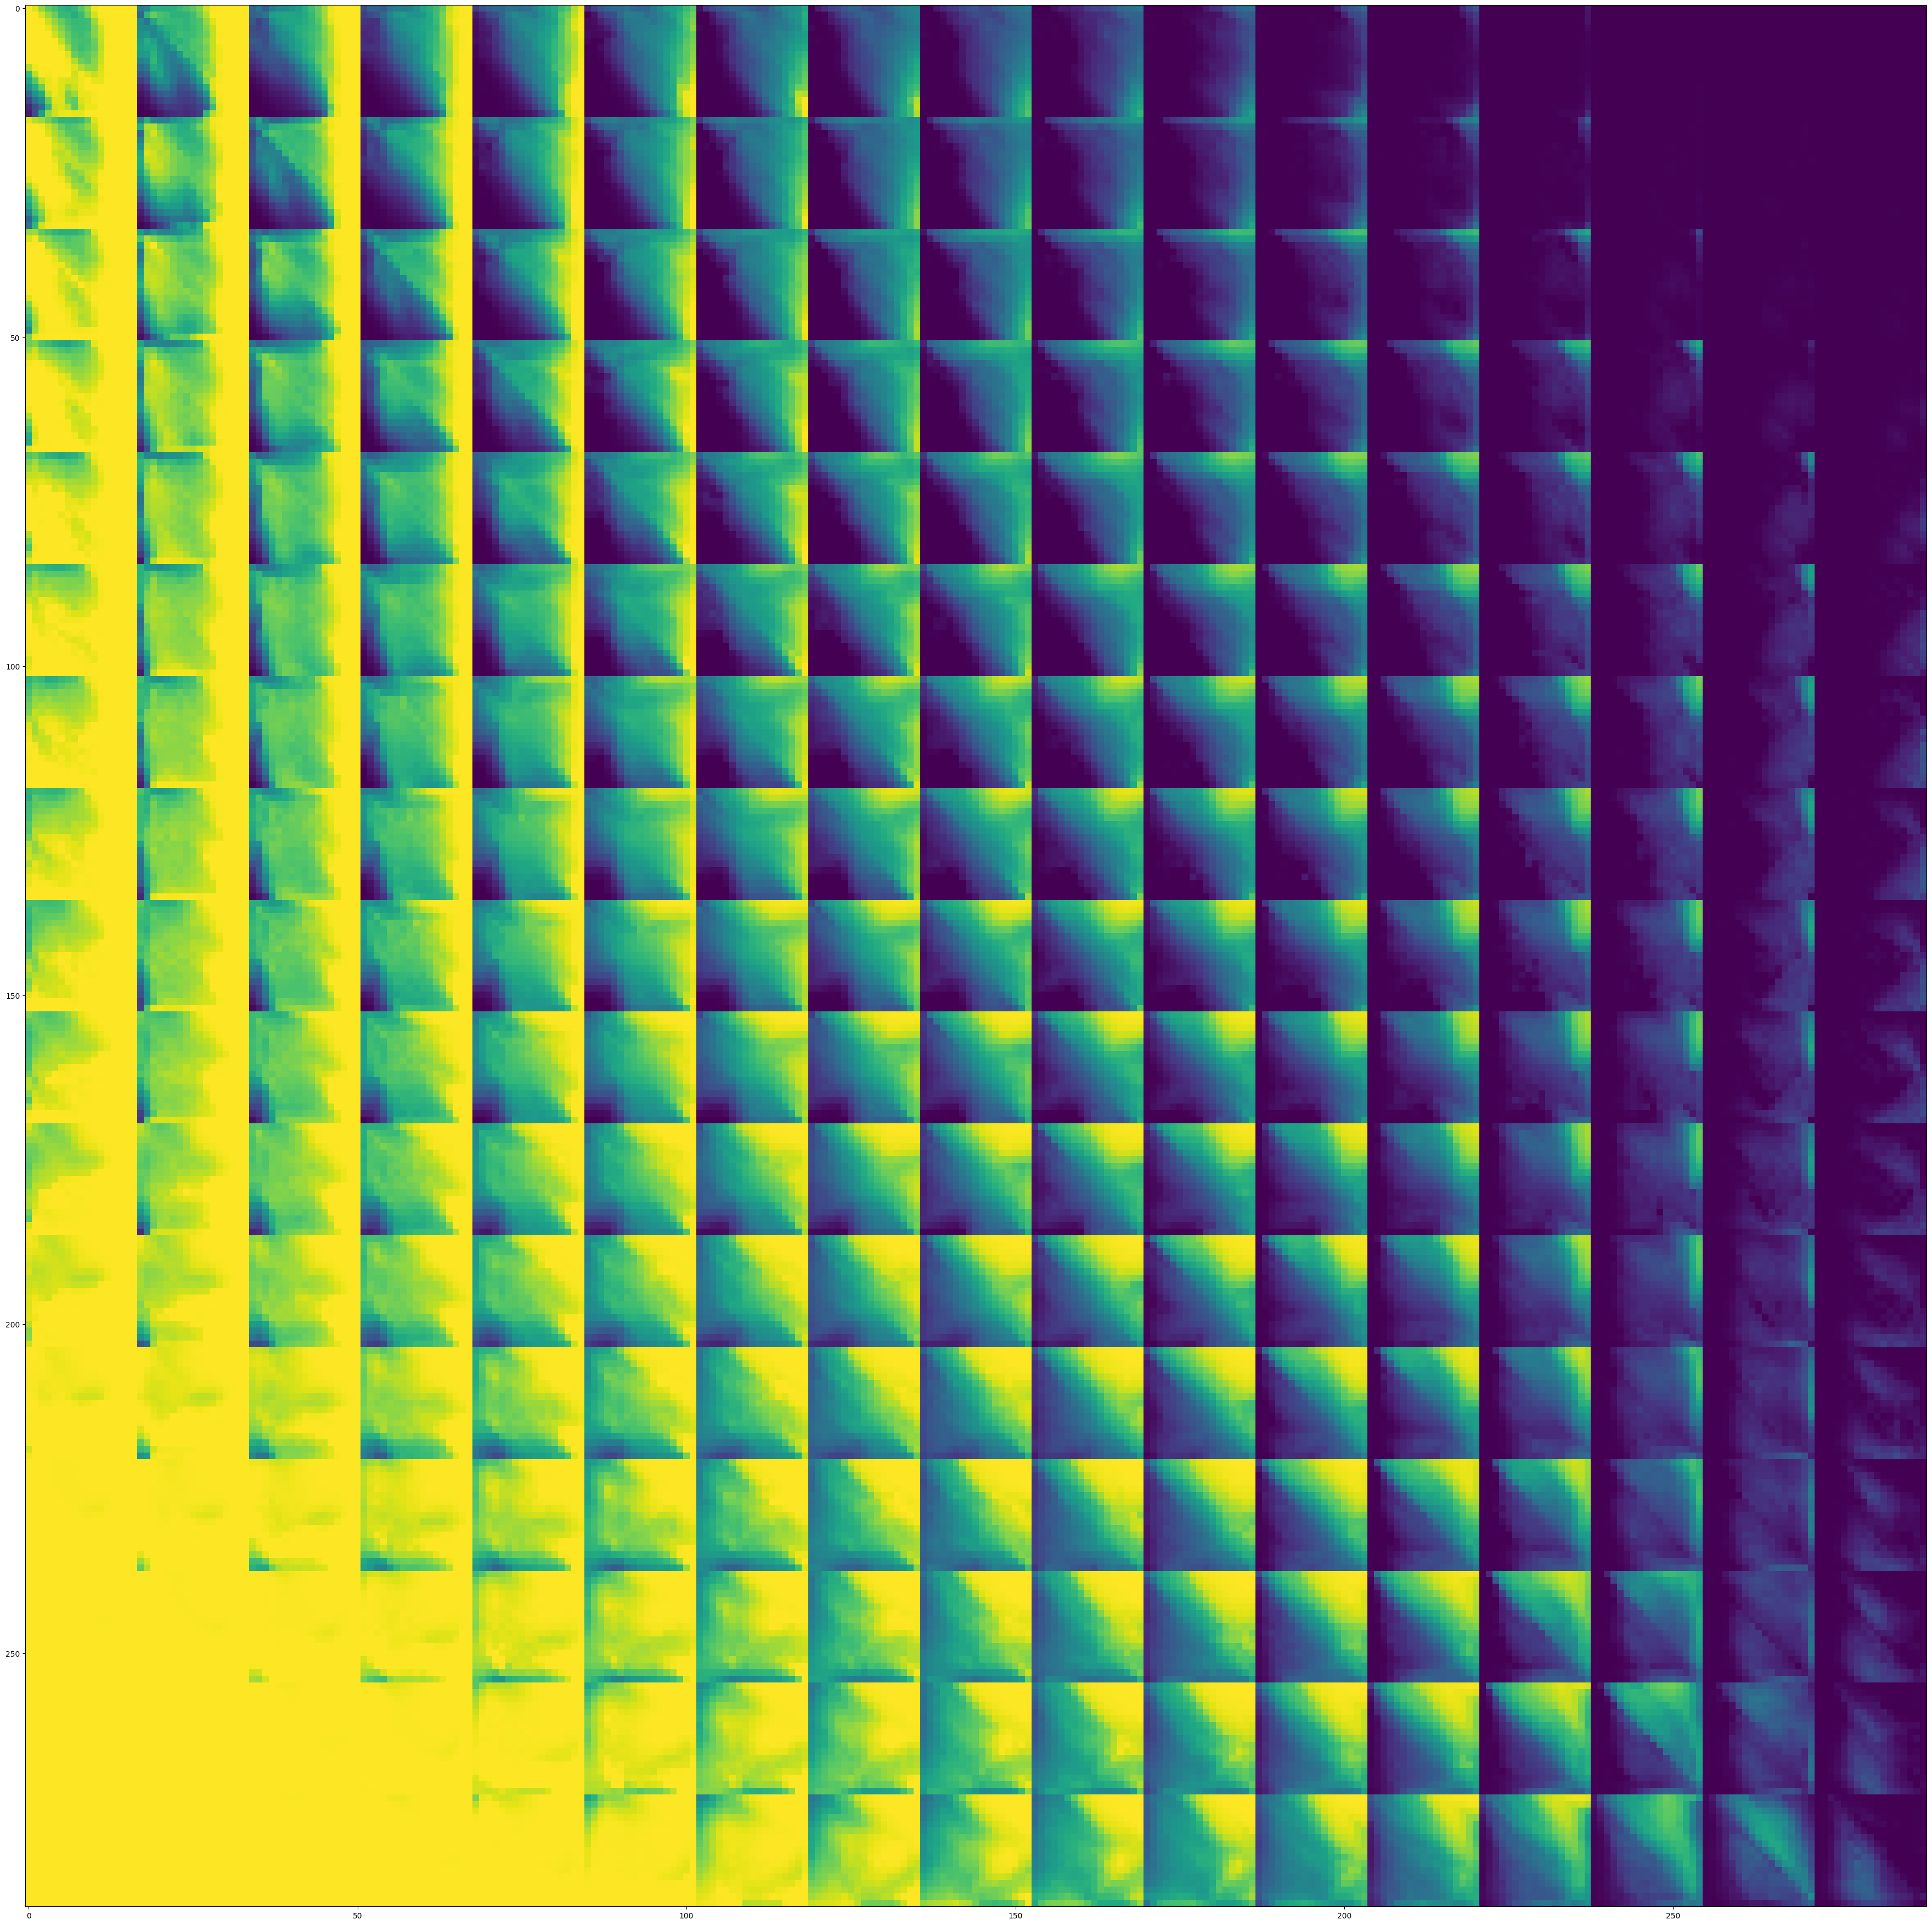

In [ ]:
from einops import rearrange

f, a = plt.subplots(1,1, figsize=(9*5, 9*5))
gg = lut1s.reshape(17**4, 1, 1)
gg = rearrange(gg, '(b1 b2) h w -> (b2 h) (b1 w) ', b1=17*17, b2=17*17)
a.imshow(gg)

In [ ]:
from models import LoadCheckpoint

# m = LoadCheckpoint("./models/SDYNetx2_DIV2K/checkpoints/SDYLutx2_0.pth")
m = LoadCheckpoint("./models/HDBHNet_RGB_DIV2K_x4/checkpoints/HDBHNet_15000.pth")
m.stage1_S

UpscaleBlock(
  (embed): Linear(in_features=4, out_features=64, bias=True)
  (linear_projections): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=192, out_features=64, bias=True)
    (3): Linear(in_features=256, out_features=64, bias=True)
  )
  (project_channels): Linear(in_features=320, out_features=16, bias=True)
)

In [ ]:
from common.lut import transfer_2x2_input_SxS_output
transfer_2x2_input_SxS_output?

Signature:
transfer_2x2_input_SxS_output(
    block,
    quantization_interval=16,
    batch_size=1024,
    max_value=255,
)
Docstring: <no docstring>
File:      /wd/lut_reproduce/src/common/lut.py
Type:      function

In [ ]:
lut = transfer_2x2_input_SxS_output(m.stage1_S, quantization_interval=1, max_value=15)

 UpscaleBlock 83521/83521    


In [ ]:
import torch 
values1d = torch.arange(0, 256, 16, dtype=torch.uint8)
values1d = torch.cat([values1d, torch.tensor([256])])
values = torch.cartesian_prod(*([values1d]*4)).view(-1, 1, 4)

In [ ]:
values[32000]

tensor([[ 96, 128, 192,  96]])

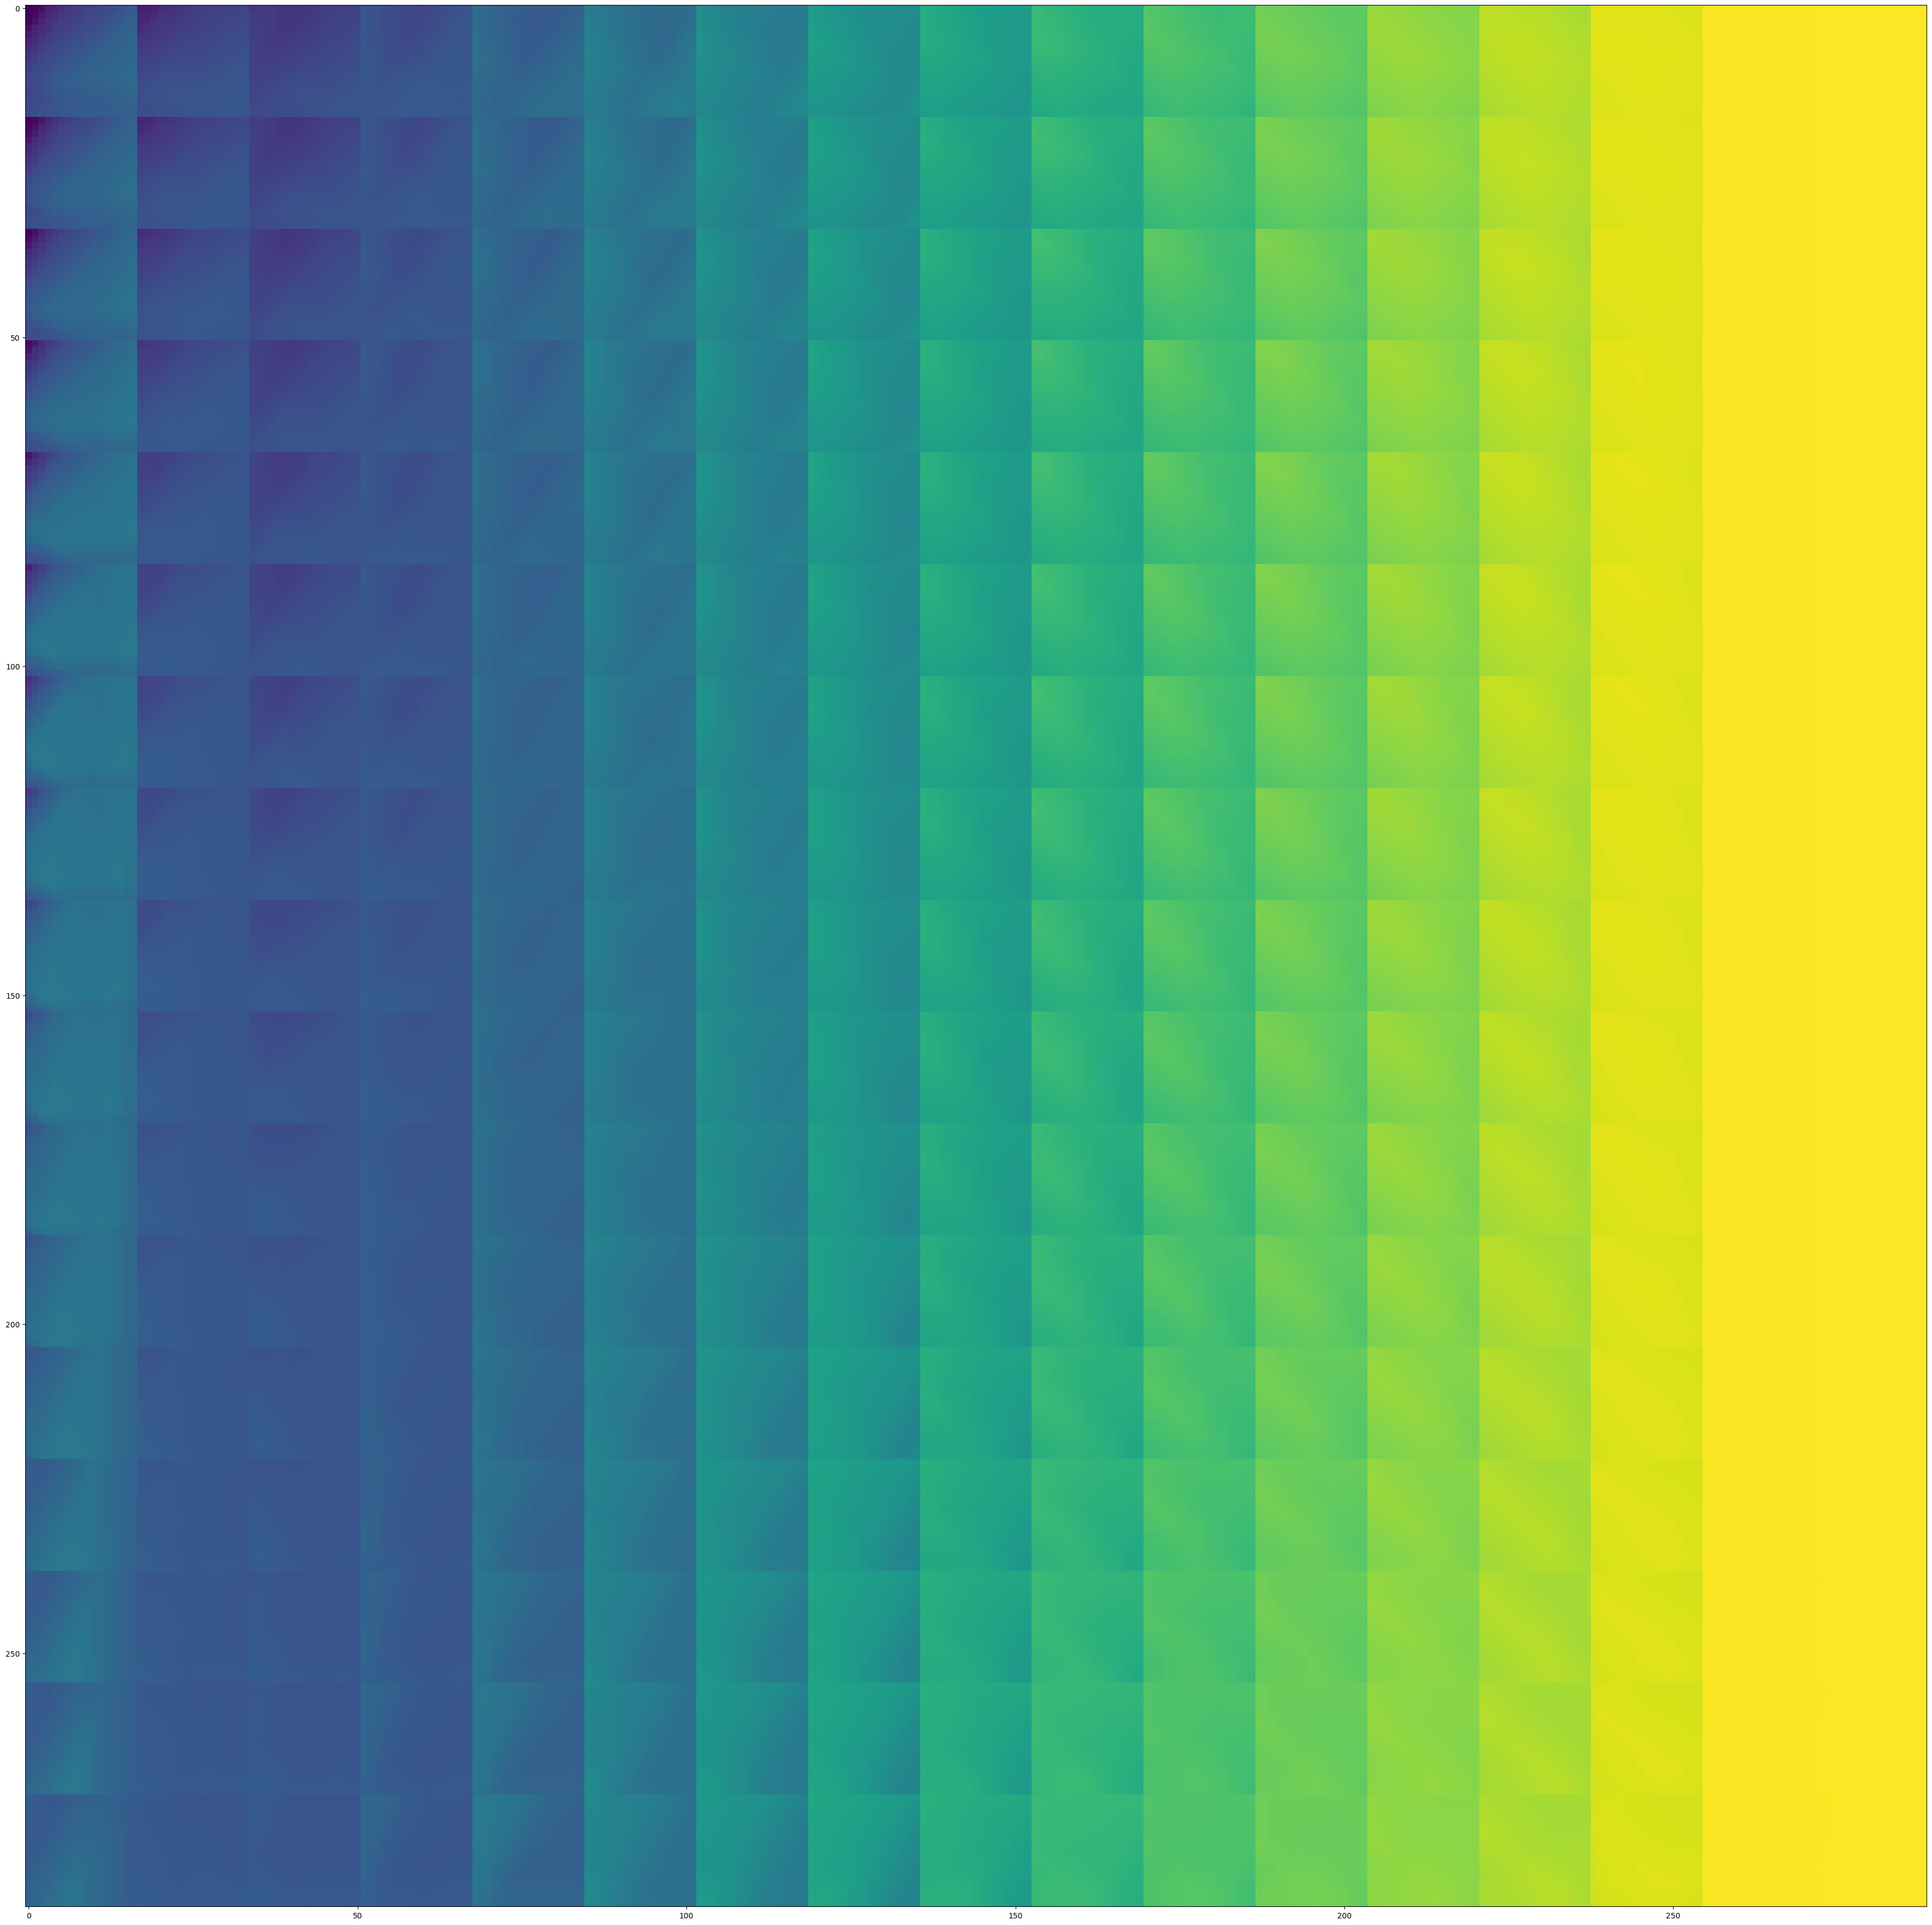

In [ ]:
from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

f, a = plt.subplots(1,1, figsize=(9*5, 9*5))
gg = lut[:,:,:,:,2,0].reshape(17**4, 1, 1)
gg = rearrange(gg, '(b1 b2) h w -> (b2 h) (b1 w) ', b1=17*17, b2=17*17)
a.imshow(gg)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from models import LoadLutCheckpoint

In [ ]:
lut = LoadLutCheckpoint("/wd/luts/models/srnet2x2/luts/0.pth")

dict_keys(['model', 'scale', 'quantization_interval', 'state_dict'])


SRLut2x2
  lut size: torch.Size([17, 17, 17, 17, 4, 4])

In [ ]:
# [lut.stage_lut[(i+8)%17,i,i,(i-8)%17] for i in range(17)]
import torch
# torch.floor_divide(torch.arange(256), 17)
# torch.arange(256) % 17
coefs = (torch.arange(17) % 17) / 17
lut.stage_lut[0,0,0,0], lut.stage_lut[1,1,1,1], coefs, lut.stage_lut[0,0,0,0] + coefs[9]*(lut.stage_lut[1,1,1,1]-lut.stage_lut[0,0,0,0])

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 1.]], grad_fn=<SelectBackward0>),
 tensor([[17., 16., 16., 16.],
         [17., 16., 16., 16.],
         [17., 17., 16., 16.],
         [17., 17., 16., 16.]], grad_fn=<SelectBackward0>),
 tensor([0.0000, 0.0588, 0.1176, 0.1765, 0.2353, 0.2941, 0.3529, 0.4118, 0.4706,
         0.5294, 0.5882, 0.6471, 0.7059, 0.7647, 0.8235, 0.8824, 0.9412]),
 tensor([[9.4706, 8.9412, 8.9412, 8.9412],
         [9.4706, 8.9412, 8.9412, 8.4706],
         [9.4706, 9.4706, 8.9412, 8.4706],
         [9.4706, 9.4706, 8.9412, 8.9412]], grad_fn=<AddBackward0>))

In [ ]:
luts = np.load("/wd/luts/models/RCNetTest/luts/RCLutTest_200000_x4_4.0bit_int8.npz", allow_pickle=True)
state_dict = luts['state_dict'].item()
state_dict

{'stage1_lut': array([[131, 131, 130, 130, 129, 129, 128, 128, 127, 126, 126, 125, 125,
         124, 124, 123, 255],
        [115, 117, 118, 120, 121, 123, 124, 126, 127, 129, 130, 131, 133,
         134, 136, 137, 255],
        [153, 150, 147, 143, 140, 137, 134, 130, 127, 124, 120, 117, 114,
         110, 107, 104, 255],
        [115, 117, 118, 120, 121, 123, 124, 126, 127, 129, 130, 132, 133,
         134, 136, 137, 255],
        [129, 129, 129, 128, 128, 128, 128, 127, 127, 127, 126, 126, 126,
         125, 125, 125, 255],
        [115, 117, 118, 120, 121, 123, 124, 126, 127, 129, 130, 131, 133,
         134, 136, 137, 255],
        [160, 156, 152, 148, 144, 140, 135, 131, 127, 123, 118, 114, 110,
         106, 102,  97, 255],
        [ 44,  52,  60,  70,  80,  91, 103, 115, 127, 140, 152, 164, 175,
         185, 194, 203, 255],
        [178, 172, 166, 160, 153, 147, 140, 134, 127, 120, 113, 107, 100,
          94,  88,  82, 255],
        [112, 114, 116, 118, 120, 122, 123, 125, 1

Text(0.5, 1.0, '5x5')

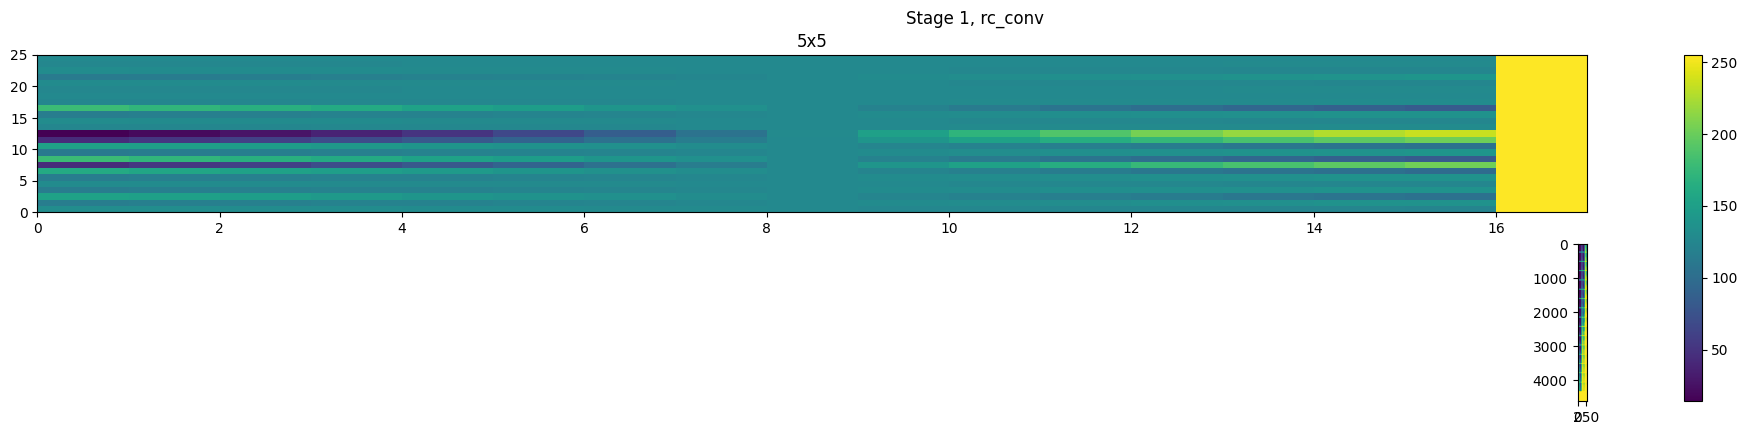

In [ ]:
f, a = plt.subplots(2,1, figsize=(25, 9/2))
lut1 = state_dict['stage1_lut']
# a[0].imshow(lut1)
a[1].imshow(np.transpose(state_dict['stage1_dense_upscale_lut'].reshape(17**2, 17*17*16)))
pcm = a[0].pcolormesh(lut1)
f.colorbar(pcm, ax=a, location='right')
f.suptitle("Stage 1, rc_conv")
a[0].set_title(f"{int(np.sqrt(lut1.shape[0]))}x{int(np.sqrt(lut1.shape[0]))}")
# a[1].set_title(f"stage1_dense_upscale_lut")

In [ ]:
from einops import rearrange

f, a = plt.subplots(1,1, figsize=(9*5, 9*5))
gg = state_dict['stage1_dense_upscale_lut'].reshape(17**4, 4, 4)
gg = rearrange(gg, '(b1 b2) h w -> (b2 h) (b1 w) ', b1=17*17, b2=17*17)
a.imshow(gg)

In [ ]:
luts = np.load("/wd/luts/models/dense_block/luts/RCLutTest_200000_x4_4.0bit_int8.npz", allow_pickle=True)
state_dict = luts['state_dict'].item()
from einops import rearrange

f, a = plt.subplots(1,1, figsize=(9*5, 9*5))
gg = state_dict['stage1_dense_upscale_lut'].reshape(17**4, 4, 4)
gg = rearrange(gg, '(b1 b2) h w -> (b2 h) (b1 w) ', b1=17*17, b2=17*17)
a.imshow(gg)

In [ ]:
luts = np.load("/wd/luts/models/dense_block_cascade/luts/RCLutTest_010000_x4_4.0bit_int8.npz", allow_pickle=True)
state_dict = luts['state_dict'].item()
from einops import rearrange

f, a = plt.subplots(1,1, figsize=(9*5, 9*5))
gg = state_dict['stage1_dense_upscale_lut'].reshape(17**4, 1, 1)
gg = rearrange(gg, '(b1 b2) h w -> (b2 h) (b1 w) ', b1=17*17, b2=17*17)
a.imshow(gg)

In [ ]:
f, a = plt.subplots(1,1, figsize=(9*5, 9*5))
gg = state_dict['stage2_dense_upscale_lut'].reshape(17**4, 4, 4)
gg = rearrange(gg, '(b1 b2) h w -> (b2 h) (b1 w) ', b1=17*17, b2=17*17)
a.imshow(gg)

Text(0.5, 1.0, '7x7')

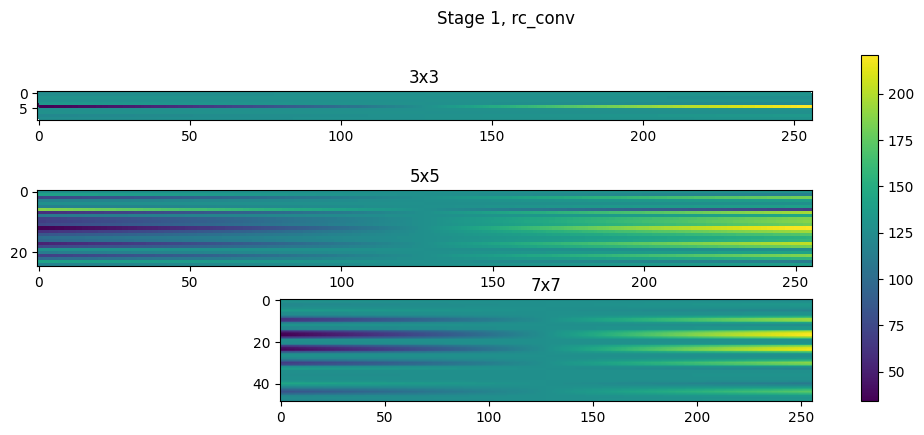

In [ ]:
f, a = plt.subplots(3,1, figsize=(25/2, 9/2))
lut1 = np.load("LUT_x4_8.0bit_int8_stage1_3x3_rc_conv.npy")
lut2 = np.load("LUT_x4_8.0bit_int8_stage1_5x5_rc_conv.npy")
lut3 = np.load("LUT_x4_8.0bit_int8_stage1_7x7_rc_conv.npy")
a[0].imshow(lut1)
a[1].imshow(lut2)
a[2].imshow(lut3)
pcm = a[0].pcolormesh(lut1)
f.colorbar(pcm, ax=a, location='right')
f.suptitle("Stage 1, rc_conv")
a[0].set_title("3x3")
a[1].set_title("5x5")
a[2].set_title("7x7")

Text(0.5, 1.0, '7x7')

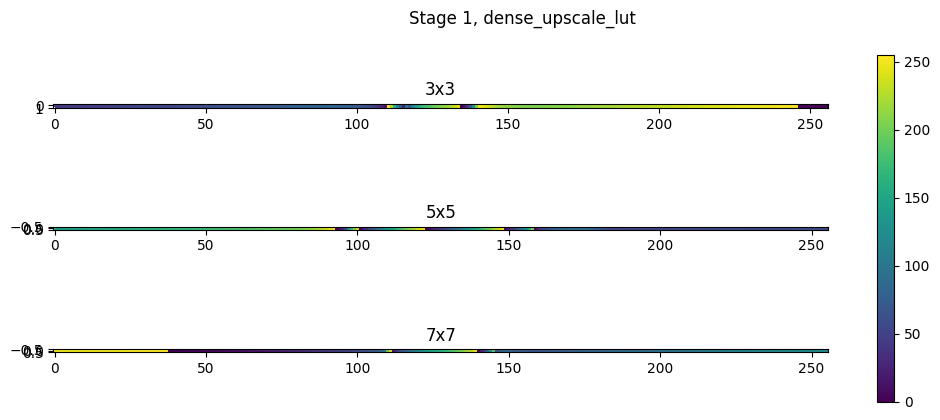

In [ ]:
f, a = plt.subplots(3,1, figsize=(25/2, 9/2))
lut1 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage1_3x3_dense_upscale_lut.npy"))
lut2 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage1_5x5_dense_upscale_lut.npy"))
lut3 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage1_7x7_dense_upscale_lut.npy"))
a[0].imshow(lut1)
a[1].imshow(lut2)
a[2].imshow(lut3)
pcm = a[0].pcolormesh(lut1)
f.colorbar(pcm, ax=a, location='right')
f.suptitle("Stage 1, dense_upscale_lut")
a[0].set_title("3x3")
a[1].set_title("5x5")
a[2].set_title("7x7")

Text(0.5, 1.0, '7x7')

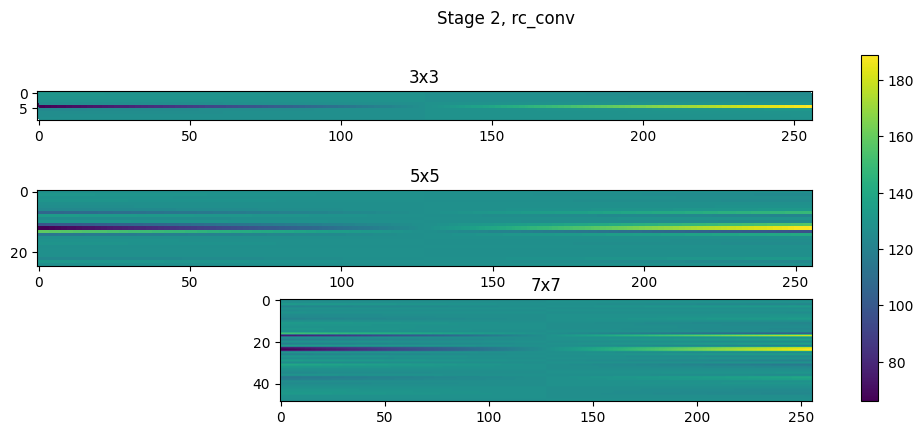

In [ ]:
f, a = plt.subplots(3,1, figsize=(25/2, 9/2))
lut1 = np.load("LUT_x4_8.0bit_int8_stage2_3x3_rc_conv.npy")
lut2 = np.load("LUT_x4_8.0bit_int8_stage2_5x5_rc_conv.npy")
lut3 = np.load("LUT_x4_8.0bit_int8_stage2_7x7_rc_conv.npy")
a[0].imshow(lut1)
a[1].imshow(lut2)
a[2].imshow(lut3)
pcm = a[0].pcolormesh(lut1)
f.colorbar(pcm, ax=a, location='right')
f.suptitle("Stage 2, rc_conv")
a[0].set_title("3x3")
a[1].set_title("5x5")
a[2].set_title("7x7")

Text(0.5, 1.0, '7x7')

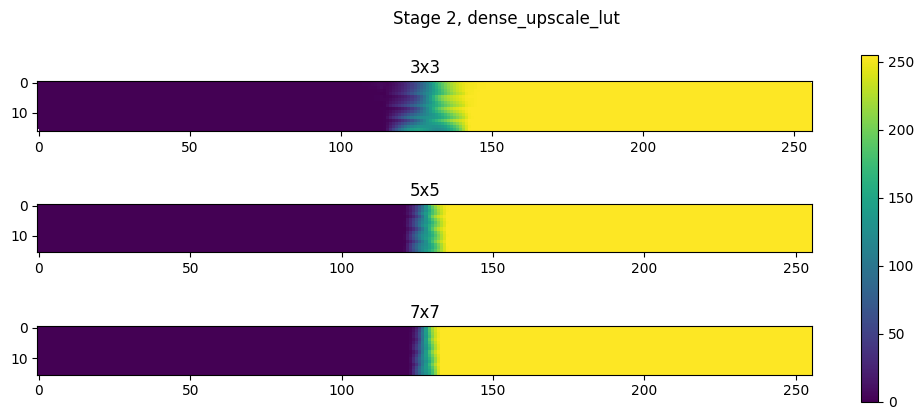

In [ ]:
f, a = plt.subplots(3,1, figsize=(25/2, 9/2))
lut1 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage2_3x3_dense_upscale_lut.npy"))
lut2 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage2_5x5_dense_upscale_lut.npy"))
lut3 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage2_7x7_dense_upscale_lut.npy"))
a[0].imshow(lut1)
a[1].imshow(lut2)
a[2].imshow(lut3)
pcm = a[0].pcolormesh(lut1)
f.colorbar(pcm, ax=a, location='right')
f.suptitle("Stage 2, dense_upscale_lut")
a[0].set_title("3x3")
a[1].set_title("5x5")
a[2].set_title("7x7")

Text(0.5, 1.0, '7x7')

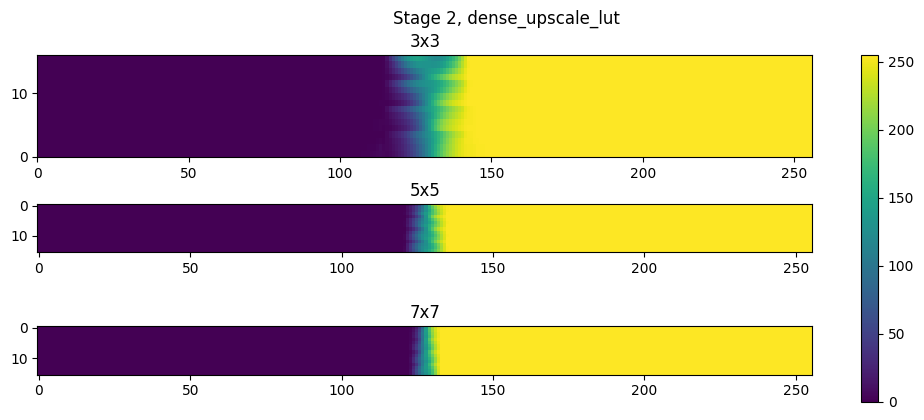

In [ ]:
f, a = plt.subplots(3,1, figsize=(25/2, 9/2))
lut1 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage2_3x3_dense_upscale_lut.npy"))
lut2 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage2_5x5_dense_upscale_lut.npy"))
lut3 = np.transpose(np.load("LUT_x4_8.0bit_int8_stage2_7x7_dense_upscale_lut.npy"))
a[1].imshow(lut2)
a[2].imshow(lut3)
pcm = a[0].pcolormesh(lut1)
f.colorbar(pcm, ax=a, location='right')
f.suptitle("Stage 2, dense_upscale_lut")
a[0].set_title("3x3")
a[1].set_title("5x5")
a[2].set_title("7x7")
# lut1[:, 100:150]

In [ ]:
import sys
sys.path.insert(0, "/wd/luts/src/")
from rclut.model import LoadRCLutCheckpoint, AVAILABLE_LUT_MODELS, RCLutx2, RCLutx1
from pathlib import Path
import torch
import numpy as np
import cv2
from PIL import Image

m = LoadRCLutCheckpoint("/wd/luts/models/RCNetx2TMP/RCLutx2_000000_x4_8.0bit_int8.npz")
image = cv2.imread("/wd/luts/data/Set5/LR_bicubic/X4/baby.png")[:,:,::-1]
# Image.fromarray(image)
m(torch.tensor(image.copy()).permute(2,0,1)[None,...])

torch.Size([3, 1, 126, 126])
torch.uint8 torch.Size([3, 1, 128, 128])
float64 (3, 1, 128, 128)
tensor(116.4444) tensor(138.5556)
tensor(116.) tensor(139.)
torch.float32 torch.Size([3, 1, 128, 128])


RuntimeError: The size of tensor a (126) must match the size of tensor b (128) at non-singleton dimension 3

In [ ]:
torch.tensor().repeat?

Object `repeat` not found.


In [ ]:
import numpy as np
import torch
weights = torch.tensor(np.tile(np.arange(255), 9*3).reshape(3, 9, 255)) +100
x = torch.rand((3,9,1))*255
x = x.round().type(torch.int64)

weights.shape, x.shape

(torch.Size([3, 9, 255]), torch.Size([3, 9, 1]))

In [ ]:
torch.gather(input=weights, dim=-1, index=x), x

(tensor([[[121],
          [212],
          [156],
          [227],
          [235],
          [201],
          [322],
          [208],
          [274]],
 
         [[119],
          [117],
          [232],
          [318],
          [183],
          [234],
          [324],
          [117],
          [166]],
 
         [[259],
          [179],
          [193],
          [176],
          [237],
          [131],
          [168],
          [233],
          [182]]]),
 tensor([[[ 21],
          [112],
          [ 56],
          [127],
          [135],
          [101],
          [222],
          [108],
          [174]],
 
         [[ 19],
          [ 17],
          [132],
          [218],
          [ 83],
          [134],
          [224],
          [ 17],
          [ 66]],
 
         [[159],
          [ 79],
          [ 93],
          [ 76],
          [137],
          [ 31],
          [ 68],
          [133],
          [ 82]]]))

In [ ]:
import torch

# Create a matrix
matrix = torch.randn(3, 4)

# Create a vector of indices
indices = torch.tensor([0, 2, 1])

# Extract elements from each row based on the indices
selected_elements = matrix[torch.arange(3)[:, None], indices]
selected_elements, matrix

(tensor([[-0.3433, -1.7434,  0.6454],
         [ 0.2597,  0.9045, -1.9901],
         [-1.0239, -1.8547,  0.1800]]),
 tensor([[-0.3433,  0.6454, -1.7434, -0.4747],
         [ 0.2597, -1.9901,  0.9045,  0.8336],
         [-1.0239,  0.1800, -1.8547, -0.5057]]))

In [ ]:
def f(x, w):
    print(x.shape, w.shape)
    return torch.index_select(w, 0, x)

bv = torch.vmap(f)
weights = torch.tensor(np.tile(np.arange(255), 9).reshape(9, 255))+100
x = torch.rand((9,3))*255
x = x.round().type(torch.int64)
bv(x, weights), x, weights

torch.Size([3]) torch.Size([255])


(tensor([[148, 257, 270],
         [286, 350, 119],
         [122, 153, 327],
         [256, 172, 198],
         [178, 218, 290],
         [295, 119, 218],
         [102, 289, 128],
         [296, 143, 327],
         [232, 295, 233]]),
 tensor([[ 48, 157, 170],
         [186, 250,  19],
         [ 22,  53, 227],
         [156,  72,  98],
         [ 78, 118, 190],
         [195,  19, 118],
         [  2, 189,  28],
         [196,  43, 227],
         [132, 195, 133]]),
 tensor([[100, 101, 102,  ..., 352, 353, 354],
         [100, 101, 102,  ..., 352, 353, 354],
         [100, 101, 102,  ..., 352, 353, 354],
         ...,
         [100, 101, 102,  ..., 352, 353, 354],
         [100, 101, 102,  ..., 352, 353, 354],
         [100, 101, 102,  ..., 352, 353, 354]]))

In [ ]:
rc_conv_3x3 = np.load("LUT_x4_8.0bit_int8_stage1_3x3_rc_conv.npy")
rc_conv_3x3[:,image].shape


(9, 126, 126, 3)

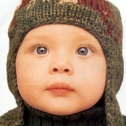

In [ ]:
m(image)

In [ ]:
srlut = np.load("/wd/SR-LUT/2_Transfer_to_LUT/Model_S_x4_4bit_int8.npy").reshape(17**4, 4*4).astype(np.int16) 
# srlut = np.load("/wd/SR-LUT/3_Test_using_LUT/Model_F_x4_4bit_int8.npy").astype(np.int16).reshape(-1, 4*4)
srlut = (srlut+128).astype(np.uint8)
srlut.shape

(83521, 16)

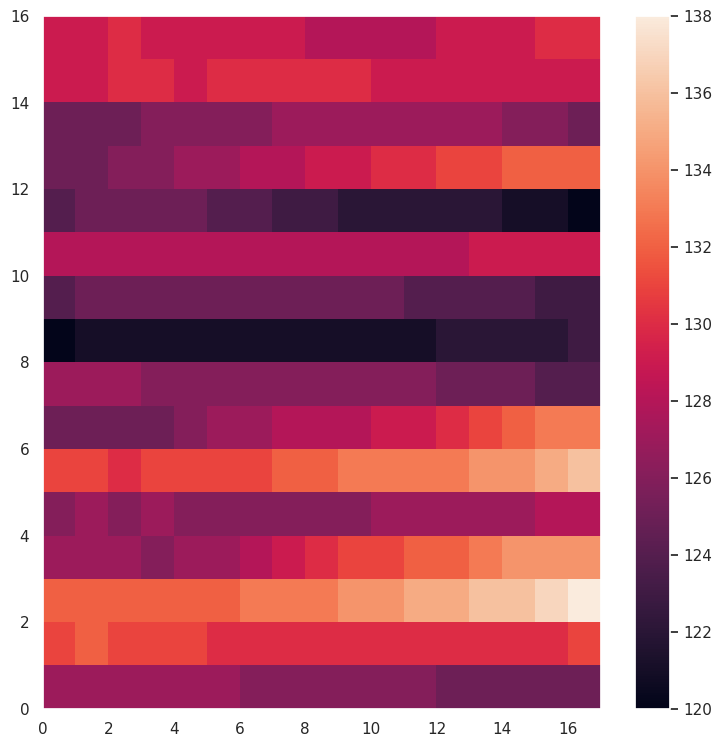

In [ ]:
f, a = plt.subplots(1,1, figsize=(9, 9))
pcm = a.pcolormesh(np.transpose(srlut[:17]))
f.colorbar(pcm, ax=a, location='right')

In [ ]:
set([i//16 for i in range(256)])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [ ]:
np.arange(0, 256, 2**4), len(np.arange(0, 256, 2**4))

(array([  0,  16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192,
        208, 224, 240]),
 16)

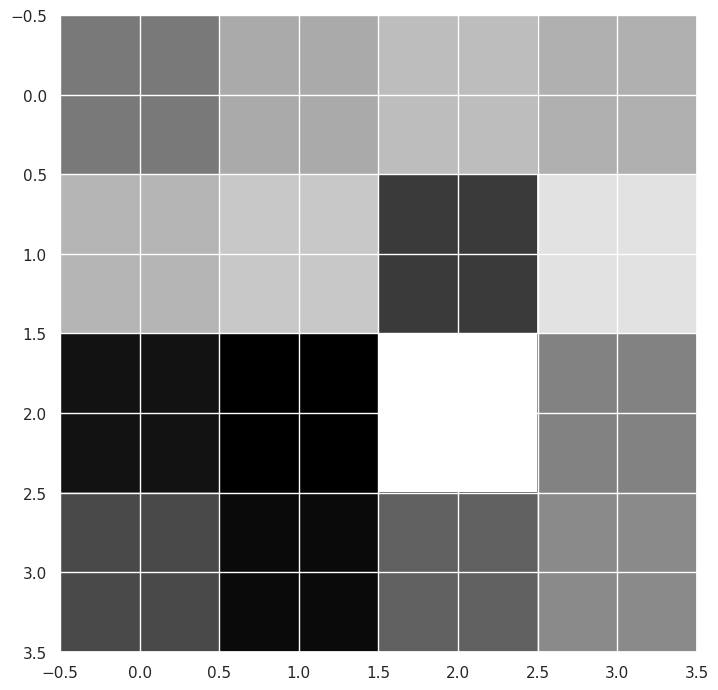

In [ ]:
a,b,c,d = 127,127,127,12,7
plt.imshow(srlut.reshape(17,17,17,17,4,4)[a//16,12//16,12//16,12//16], cmap='gray')

Text(112.49999999999999, 0.5, 'output pixel')

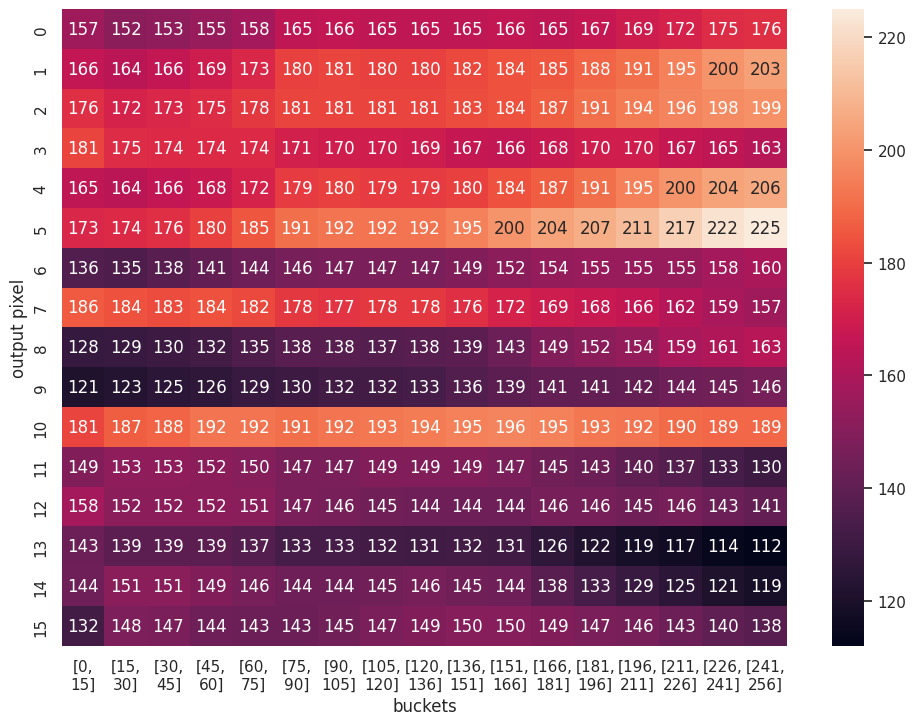

In [ ]:
import seaborn as sns
import pandas as pd
tt = srlut.reshape(17,17,17,17,16)
i = 8
aa = pd.DataFrame(np.transpose(tt[i,5,5,:,:]))
aa.columns = [f"[{x*(256/17):.0f},\n{(x+1)*(256/17):.0f}]" for x in np.arange(17)]
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
a = sns.heatmap(aa, annot=True, fmt=".0f")
a.set_xlabel("buckets")
a.set_ylabel("output pixel")
# aa

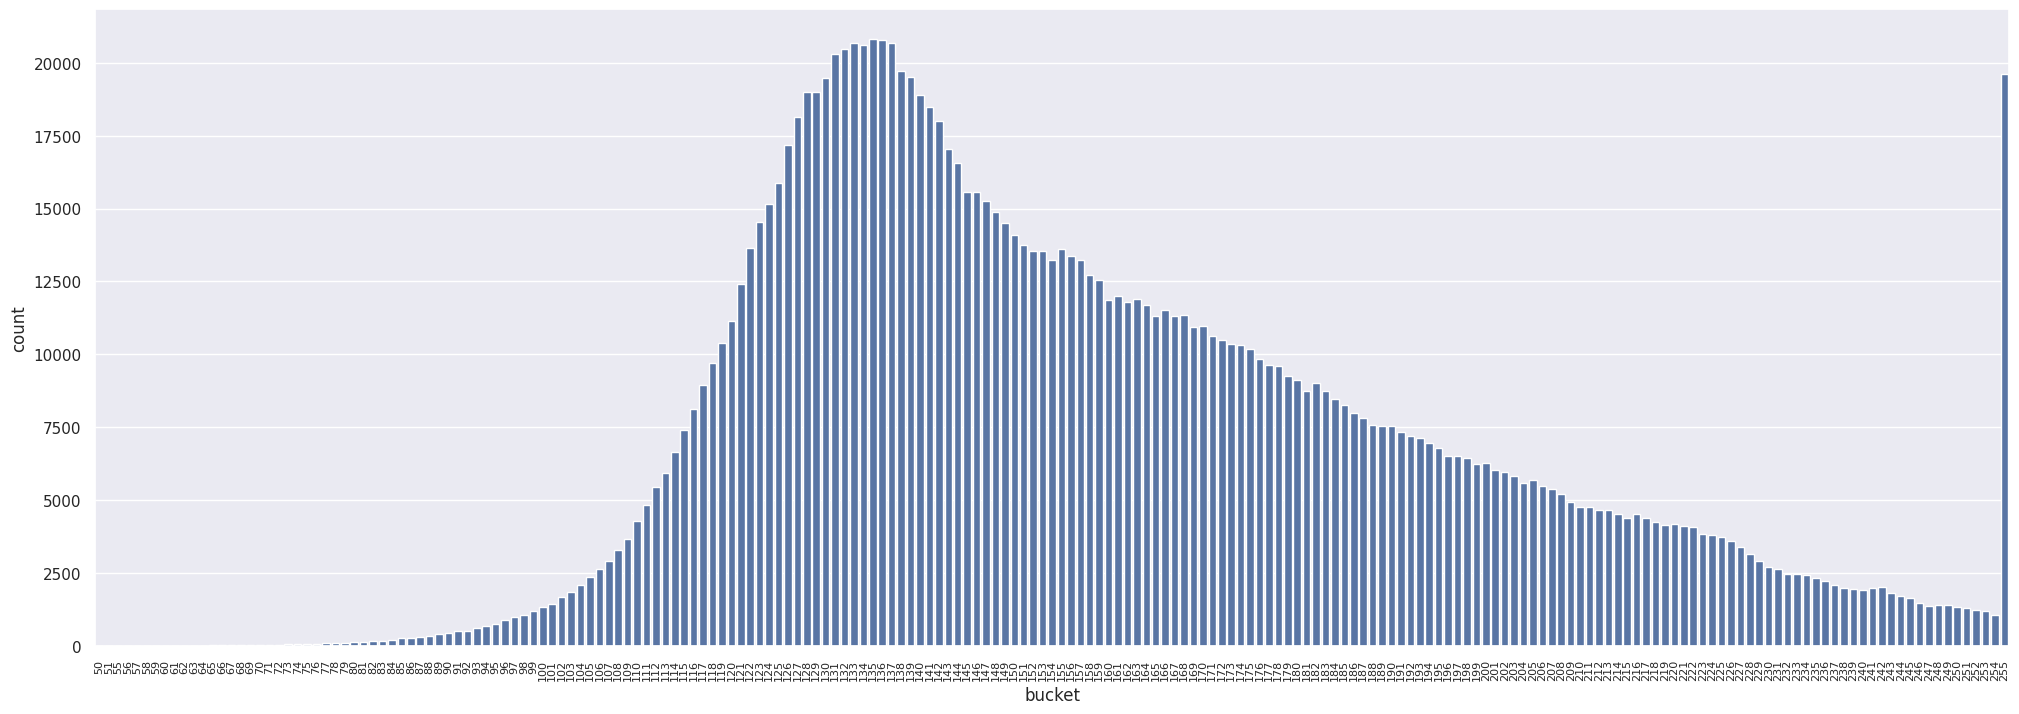

In [ ]:
hh = pd.DataFrame(srlut.flatten()).value_counts().reset_index().sort_values(by=0)
hh.columns = ['bucket', 'count']
sns.set_theme(rc={'figure.figsize':(24.7,8.27)})
sns.barplot(data=hh, x='bucket', y='count')
plt.xticks(rotation=90, fontsize=8);

In [ ]:
np.transpose(srlut[:17]+127).min(), np.transpose(srlut[:17]+127).max()

(-128, 127)

In [ ]:
srlut[:17].dtype

dtype('int8')

In [ ]:
(srlut[:17]+127).min()

-128

In [ ]:
import cv2
from pathlib import Path

ds_path = Path("/wd/luts/data/Synthetic/")
hr_path = ds_path / "HR"
lr_path = ds_path / "LR"
w = h = 1024

for i in range(256):
    cv2.imwrite(str(hr_path / f"const_{i:04d}.png"), np.full((w,h,3), fill_value=i, dtype=np.uint8))
    for scale in [2,4]:
        cv2.imwrite(str(lr_path / f"X{scale}" / f"const_{i:04d}.png"), np.full((w//scale,h//scale,3), fill_value=i, dtype=np.uint8))

# for i in range(256):
im = np.ones((w,h,3), dtype=np.uint8)
for i in range(h):
    im[i] *= int((i / h) * 255)
cv2.imwrite(str(hr_path / f"linear.png"), im)
for scale in [2,4]:
    im = np.ones((w//scale,h//scale,3), dtype=np.uint8)
    for i in range(h//scale):
        im[i] *= int((i / (h//scale)) * 255)
    cv2.imwrite(str(lr_path / f"X{scale}" / f"linear.png"), im)

In [ ]:
import numpy as np
im = np.ones((w,h,3), dtype=np.uint8)
for c in range(3):
    im = np.rot90(im, c)
    for i in range(h):
        for j in range(w):
            im[i,j,c] *= int(((i + j)/ (h + w)) * 255)
cv2.imwrite(str(hr_path / f"diagonalc.png"), im)
for scale in [2,4]:
    im = np.ones((w//scale,h//scale,3), dtype=np.uint8)
    for c in range(3):
        im = np.rot90(im, c)
        for i in range(h//scale):
            for j in range(w//scale):
                im[i,j,c] *= int(((i + j)/ (h//scale + w//scale)) * 255)
    cv2.imwrite(str(lr_path / f"X{scale}" / f"diagonalc.png"), im)

In [ ]:
import torch
import torch.nn.functional as F
n = 4
a = torch.arange(n**2).view(1,1,n,n).type(torch.float32)
b = F.unfold(a, kernel_size=(2,2))
a, b, a.shape, b.shape,
gg = torch.nn.Linear(9,1)
gg(b).shape

torch.Size([1, 4, 1])

In [ ]:
torch.nn.Linear?

Init signature:
torch.nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`.

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class PercievePatternv2():
    def __init__(self, receptive_field_idxes=[[0,0],[0,1],[1,0],[1,1]], center=[0,0], window_size=2):
        assert window_size >= (np.max(receptive_field_idxes)+1)
        self.receptive_field_idxes = np.array(receptive_field_idxes)
        self.window_size = window_size
        self.center = center
        self.receptive_field_idxes = [
            self.receptive_field_idxes[0,0]*self.window_size + self.receptive_field_idxes[0,1],
            self.receptive_field_idxes[1,0]*self.window_size + self.receptive_field_idxes[1,1],
            self.receptive_field_idxes[2,0]*self.window_size + self.receptive_field_idxes[2,1],
            self.receptive_field_idxes[3,0]*self.window_size + self.receptive_field_idxes[3,1],
        ]

    def __call__(self, x):
        b,c,h,w = x.shape
        x = F.pad(
            x, 
            pad=[self.center[0], self.window_size-self.center[0]-1,
                 self.center[1], self.window_size-self.center[1]-1], 
            mode='replicate'
        )
        x = F.unfold(input=x, kernel_size=self.window_size)
        x = torch.stack([
            x[:,self.receptive_field_idxes[0],:],
            x[:,self.receptive_field_idxes[1],:],
            x[:,self.receptive_field_idxes[2],:],
            x[:,self.receptive_field_idxes[3],:]
        ], 2)
        # x = x.reshape(x.shape[0]*x.shape[1], 1, 2, 2)
        return x

In [ ]:
_extract_pattern = PercievePatternv2(receptive_field_idxes=[[0,0],[0,1],[1,0],[1,1]], center=[0,0], window_size=2)
n = 3
a = torch.arange(n**2).view(1,1,n,n).type(torch.float32)
a, _extract_pattern(a), _extract_pattern(a).shape

(tensor([[[[0., 1., 2.],
           [3., 4., 5.],
           [6., 7., 8.]]]]),
 tensor([[[0., 1., 3., 4.],
          [1., 2., 4., 5.],
          [2., 2., 5., 5.],
          [3., 4., 6., 7.],
          [4., 5., 7., 8.],
          [5., 5., 8., 8.],
          [6., 7., 6., 7.],
          [7., 8., 7., 8.],
          [8., 8., 8., 8.]]]),
 torch.Size([1, 9, 4]))

In [ ]:
def round_func(input):
    # Backward Pass Differentiable Approximation (BPDA)
    # This is equivalent to replacing round function (non-differentiable)
    # with an identity function (differentiable) only when backward,
    forward_value = torch.round(input)
    out = input.clone()
    out.data = forward_value.data
    return out 

In [ ]:
class DenseConvUpscaleBlockv2(nn.Module):
    def __init__(self, receptive_field_idxes=[[0,0],[0,1],[1,0],[1,1]], center=[0,0], window_size=2, in_features=4, hidden_dim = 32, layers_count=5, upscale_factor=1):
        super(DenseConvUpscaleBlockv2, self).__init__()   
        assert layers_count > 0     
        self.percieve_pattern = PercievePatternv2(receptive_field_idxes=receptive_field_idxes, center=center, window_size=window_size)
        self.upscale_factor = upscale_factor 
        self.hidden_dim = hidden_dim
        self.embed = nn.Linear(in_features=in_features, out_features=hidden_dim, bias=True)
        
        self.linear_projections = []
        for i in range(layers_count):
            self.linear_projections.append(nn.Linear(in_features=(i+1)*hidden_dim, out_features=hidden_dim, bias=True))
        self.linear_projections = nn.ModuleList(self.linear_projections)          

        self.project_channels = nn.Linear(in_features=(layers_count+1)*hidden_dim, out_features=upscale_factor * upscale_factor, bias=True)
    
    def forward(self, x):
        b,c,h,w = x.shape
        x = (x-127.5)/127.5    
        x = self.percieve_pattern(x)
        x = torch.relu(self.embed(x))
        for linear_projection in self.linear_projections:
            x = torch.cat([x, torch.relu(linear_projection(x))], dim=2)
        x = self.project_channels(x)
        x = x.reshape(b, c, h*self.upscale_factor, w*self.upscale_factor)
        x = torch.tanh(x)         
        x = x*127.5 + 127.5 
        x = round_func(x)
        return x  

layer = DenseConvUpscaleBlockv2()
layer(a)

tensor([[[[113., 113., 113.],
          [113., 113., 113.],
          [113., 113., 113.]]]], grad_fn=<CloneBackward0>)

In [ ]:
rotations_count = -1
b = torch.rot90(a, k=rotations_count, dims=[-2, -1])
c = torch.rot90(b, k=-rotations_count, dims=[-2, -1])
c

tensor([[[[0., 1., 2.],
          [3., 4., 5.],
          [6., 7., 8.]]]])

torch.Size([1, 9, 4])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (18x32 and 64x32)

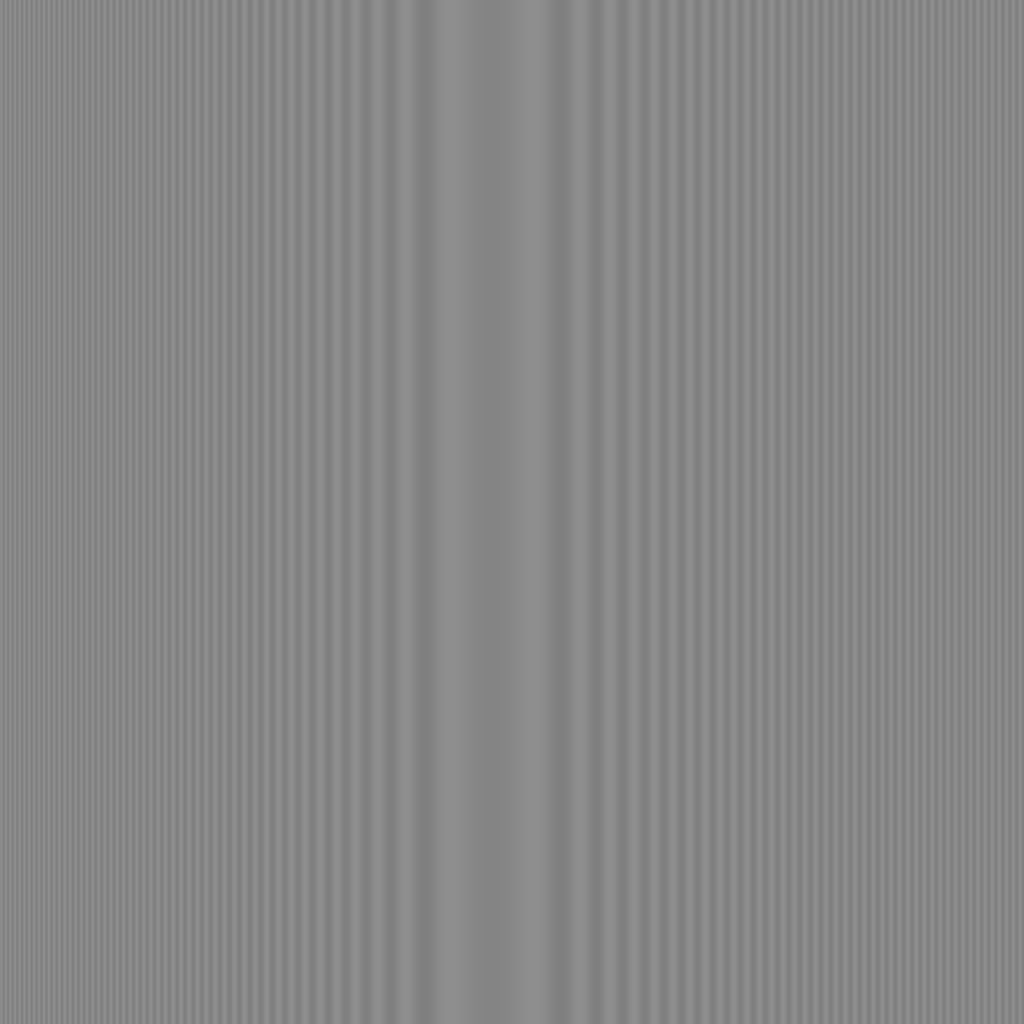

In [27]:
im_x1, im_x2, im_x4 = gen_sin_im2(tgt_size=256*4, exponent_coef=.148/1.9*2, max_value=16, rotate_angle=0, start_val=127)
im_x1

In [30]:
for angle in range(90):
    max_value = 15
    for start_val in range(0, 255-max_value+1, max_value):
        coef = .148/1.9*2
        im_x1, im_x2, im_x4 = gen_sin_im2(tgt_size=256*4, exponent_coef=coef, max_value=max_value, rotate_angle=angle, start_val=start_val)
        name = f"sin_{int(coef*100):03d}_{max_value}_{angle}_{start_val}"
        print(name)
        im_x1.save(f"./data/SyntheticTrain/HR/v2{name}.png") 
        im_x2.save(f"./data/SyntheticTrain/LR/X2/v2{name}.png") 
        im_x4.save(f"./data/SyntheticTrain/LR/X4/v2{name}.png") 

sin_015_15_0_0
sin_015_15_0_15
sin_015_15_0_30
sin_015_15_0_45
sin_015_15_0_60
sin_015_15_0_75
sin_015_15_0_90
sin_015_15_0_105
sin_015_15_0_120
sin_015_15_0_135
sin_015_15_0_150
sin_015_15_0_165
sin_015_15_0_180
sin_015_15_0_195
sin_015_15_0_210
sin_015_15_0_225
sin_015_15_0_240
sin_015_15_1_0
sin_015_15_1_15
sin_015_15_1_30
sin_015_15_1_45
sin_015_15_1_60
sin_015_15_1_75
sin_015_15_1_90
sin_015_15_1_105
sin_015_15_1_120
sin_015_15_1_135
sin_015_15_1_150
sin_015_15_1_165
sin_015_15_1_180
sin_015_15_1_195
sin_015_15_1_210
sin_015_15_1_225
sin_015_15_1_240
sin_015_15_2_0
sin_015_15_2_15
sin_015_15_2_30
sin_015_15_2_45
sin_015_15_2_60
sin_015_15_2_75
sin_015_15_2_90
sin_015_15_2_105
sin_015_15_2_120
sin_015_15_2_135
sin_015_15_2_150
sin_015_15_2_165
sin_015_15_2_180
sin_015_15_2_195
sin_015_15_2_210
sin_015_15_2_225
sin_015_15_2_240
sin_015_15_3_0
sin_015_15_3_15
sin_015_15_3_30
sin_015_15_3_45
sin_015_15_3_60
sin_015_15_3_75
sin_015_15_3_90
sin_015_15_3_105
sin_015_15_3_120
sin_015_15_3

In [250]:
Path("./data/Synthetic/HR/").mkdir(parents=True, exist_ok=True)
Path("./data/Synthetic/LR/X2").mkdir(parents=True, exist_ok=True)
Path("./data/Synthetic/LR/X4").mkdir(parents=True, exist_ok=True)

In [26]:
from PIL import Image
import numpy as np

def gen_sin_im(tgt_size=640, exponent_coef=0.8, max_value=255, rotate_angle=0):
    normal_size = int((np.sqrt(2)-1)*tgt_size*np.cos(np.radians(rotate_angle/np.pi)))
    size = tgt_size+normal_size*2
    im = np.linspace(0,np.pi*size,num=size)+np.pi
    im = np.sin(im**exponent_coef)
    im = np.stack([im]*size)
    im = im-im.min()
    im = im/im.max()
    im = im*max_value
    im = im.astype(np.uint8)
    # im = im[normal_size:-normal_size,normal_size:-normal_size]
    im_hr = Image.fromarray(im, mode='L')
    im_hr = im_hr.rotate(rotate_angle)
    im_hr = im_hr.crop((normal_size,normal_size,im.shape[1]-normal_size,im.shape[0]-normal_size))
    im_x2 = im_hr.copy()
    im_x4 = im_hr.copy()
    im_x2.thumbnail([tgt_size//2,tgt_size//2], resample=Image.LANCZOS)
    im_x4.thumbnail([tgt_size//4,tgt_size//4], resample=Image.LANCZOS)
    return im_hr, im_x2, im_x4

def gen_sin_im2(tgt_size=640, exponent_coef=0.8, max_value=255, rotate_angle=0, start_val = 0):
    normal_size = int((np.sqrt(2)-1)*tgt_size*np.cos(np.radians(rotate_angle/np.pi)))
    size = tgt_size+normal_size*2
    im = np.linspace(0,np.pi*size,num=size)+np.pi
    im = np.sin(im*im**exponent_coef)
    im = np.stack([im]*size)
    im = im-im.min()
    im = im/im.max()
    im = im*max_value+start_val 
    im = im.astype(np.uint8)
    # im = im[normal_size:-normal_size,normal_size:-normal_size]
    im_hr = Image.fromarray(im, mode='L')
    im_hr = im_hr.rotate(rotate_angle)
    im_hr = im_hr.crop((normal_size,normal_size,im.shape[1]-normal_size,im.shape[0]-normal_size))
    im_x2 = im_hr.copy()
    im_x4 = im_hr.copy()
    im_x2.thumbnail([tgt_size//2,tgt_size//2], resample=Image.LANCZOS)
    im_x4.thumbnail([tgt_size//4,tgt_size//4], resample=Image.LANCZOS)
    return im_hr, im_x2, im_x4
# for max_value in range(1, 255):

# im_x1, im_x2, im_x4 = gen_sin_im(size=256*4, exponent_coef=coef, max_value=max_value, rotate_angle=45)
# im_x1

In [93]:
max_value = 255    
for angle in [45,90,135]:
    coef = 0.55
    im_x1, im_x2, im_x4 = gen_sin_im(tgt_size=256*4, exponent_coef=coef, max_value=max_value, rotate_angle=angle)
    name = f"sin_{int(coef*100):03d}_{max_value}_{angle}"
    print(name)
    im_x1.save(f"./data/Synthetic/HR/{name}.png") 
    im_x2.save(f"./data/Synthetic/LR/X2/{name}.png") 
    im_x4.save(f"./data/Synthetic/LR/X4/{name}.png") 


sin_055_255_45
sin_055_255_90
sin_055_255_135


In [123]:
max_value = 255    
for angle in range(90):
    coef = .148/2
    im_x1, im_x2, im_x4 = gen_sin_im2(tgt_size=256*4, exponent_coef=coef, max_value=max_value, rotate_angle=angle)
    name = f"sin_{int(coef*100):03d}_{max_value}_{angle}"
    print(name)
    im_x1.save(f"./data/Synthetic/HR/v2{name}.png") 
    im_x2.save(f"./data/Synthetic/LR/X2/v2{name}.png") 
    im_x4.save(f"./data/Synthetic/LR/X4/v2{name}.png") 


sin_007_255_0
sin_007_255_1
sin_007_255_2
sin_007_255_3
sin_007_255_4
sin_007_255_5
sin_007_255_6
sin_007_255_7
sin_007_255_8
sin_007_255_9
sin_007_255_10
sin_007_255_11
sin_007_255_12
sin_007_255_13
sin_007_255_14
sin_007_255_15
sin_007_255_16
sin_007_255_17
sin_007_255_18
sin_007_255_19
sin_007_255_20
sin_007_255_21
sin_007_255_22
sin_007_255_23
sin_007_255_24
sin_007_255_25
sin_007_255_26
sin_007_255_27
sin_007_255_28
sin_007_255_29
sin_007_255_30
sin_007_255_31
sin_007_255_32
sin_007_255_33
sin_007_255_34
sin_007_255_35
sin_007_255_36
sin_007_255_37
sin_007_255_38
sin_007_255_39
sin_007_255_40
sin_007_255_41
sin_007_255_42
sin_007_255_43
sin_007_255_44
sin_007_255_45
sin_007_255_46
sin_007_255_47
sin_007_255_48
sin_007_255_49
sin_007_255_50
sin_007_255_51
sin_007_255_52
sin_007_255_53
sin_007_255_54
sin_007_255_55
sin_007_255_56
sin_007_255_57
sin_007_255_58
sin_007_255_59
sin_007_255_60
sin_007_255_61
sin_007_255_62
sin_007_255_63
sin_007_255_64
sin_007_255_65
sin_007_255_66
sin_0

In [ ]:
from PIL import Image
import numpy as np

def PSNR(y_true, y_pred, shave_border=4):
    target_data = np.array(y_true, dtype=np.float32)
    ref_data = np.array(y_pred, dtype=np.float32)

    diff = ref_data - target_data
    if shave_border > 0:
        diff = diff[shave_border:-shave_border, shave_border:-shave_border]
    rmse = np.sqrt(np.mean(np.power(diff, 2)))

    return 20 * np.log10(255. / rmse)

def _rgb2ycbcr(img, maxVal=255):
    O = np.array([[16],
                  [128],
                  [128]])
    T = np.array([[0.256788235294118, 0.504129411764706, 0.097905882352941],
                  [-0.148223529411765, -0.290992156862745, 0.439215686274510],
                  [0.439215686274510, -0.367788235294118, -0.071427450980392]])

    if maxVal == 1:
        O = O / 255.0

    t = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
    t = np.dot(t, np.transpose(T))
    t[:, 0] += O[0]
    t[:, 1] += O[1]
    t[:, 2] += O[2]
    ycbcr = np.reshape(t, [img.shape[0], img.shape[1], img.shape[2]])

    return ycbcr

image = np.array(Image.open("./data/Set14/HR/monarch.png"))
np.random.seed(2)
noise = np.random.randint(-5,5,size=image.shape)

def with_noise(image, noise):
    return (image + noise).clip(0,255).astype(np.uint8)

a = _rgb2ycbcr(image)[:,:,0]
b = _rgb2ycbcr(with_noise(image, noise))[:,:,0]

image = np.array(Image.open("./data/Set14/HR/monarch.png").convert("YCbCr").getchannel(0))
c = image
d = with_noise(image, noise[:,:,0])

image = np.array(Image.open("./data/Set14/HR/monarch.png"))
y = _rgb2ycbcr(image)[:,:,0]
e = y
f = with_noise(y, noise[:,:,0])

noise_before_rgb2y = PSNR(a, b)
noise_after_pil_rgb2y = PSNR(c, d)
noise_after_mutlut_rgb2y = PSNR(e, f)

# 43.49568901720914, 38.837762584624734, 38.445220463904704
noise_before_rgb2y, noise_after_pil_rgb2y, noise_after_mutlut_rgb2y

(43.49568901720914, 38.837762584624734, 38.445220463904704)

In [254]:
for angle in range(0,271, 15):
    coef = 0.23
    max_value=255
    im_x1, im_x2, im_x4 = gen_sin_im(tgt_size=256*4, exponent_coef=coef, max_value=max_value, rotate_angle=angle)
    name = f"sin_{int(coef*100):03d}_{max_value}_{angle}"
    print(name)
    im_x1.save(f"./data/Synthetic/HR/{name}.png") 
    im_x2.save(f"./data/Synthetic/LR/X2/{name}.png") 
    im_x4.save(f"./data/Synthetic/LR/X4/{name}.png") 


sin_023_255_0
sin_023_255_15
sin_023_255_30
sin_023_255_45
sin_023_255_60
sin_023_255_75
sin_023_255_90
sin_023_255_105
sin_023_255_120
sin_023_255_135
sin_023_255_150
sin_023_255_165
sin_023_255_180
sin_023_255_195
sin_023_255_210
sin_023_255_225
sin_023_255_240
sin_023_255_255
sin_023_255_270


In [227]:
from pathlib import Path

hr = list(Path("./data/Synthetic/LR/X4/").glob("*"))
sizes = [[f,Image.open(f).size[0],Image.open(f).size[0]] for f in hr]
import pandas as pd
df = pd.DataFrame(sizes, columns=['path', 'width', 'height'])
df

path  width  height
0          data/Synthetic/LR/X4/const_0000.png    256     256
1          data/Synthetic/LR/X4/const_0001.png    256     256
2          data/Synthetic/LR/X4/const_0002.png    256     256
3          data/Synthetic/LR/X4/const_0003.png    256     256
4          data/Synthetic/LR/X4/const_0004.png    256     256
...                                        ...    ...     ...
1271   data/Synthetic/LR/X4/sin_085_253_90.png    256     256
1272  data/Synthetic/LR/X4/sin_085_253_135.png    256     256
1273   data/Synthetic/LR/X4/sin_085_254_45.png    256     256
1274   data/Synthetic/LR/X4/sin_085_254_90.png    256     256
1275  data/Synthetic/LR/X4/sin_085_254_135.png    256     256

[1276 rows x 3 columns]

In [ ]:
hr = list(Path("./data/Synthetic/HR/").glob("*"))
sizes = [[f,Image.open(f).size[0],Image.open(f).size[0]] for f in hr]
import pandas as pd
df = pd.DataFrame(sizes, columns=['path', 'width', 'height'])
df

path  width  height
0         data/Synthetic/HR/const_0000.png   1024    1024
1         data/Synthetic/HR/const_0001.png   1024    1024
2         data/Synthetic/HR/const_0002.png   1024    1024
3         data/Synthetic/HR/const_0003.png   1024    1024
4         data/Synthetic/HR/const_0004.png   1024    1024
...                                    ...    ...     ...
1271  data/Synthetic/HR/sin_085_252_90.png   1024    1024
1272  data/Synthetic/HR/sin_085_253_45.png   1024    1024
1273  data/Synthetic/HR/sin_085_253_90.png   1024    1024
1274  data/Synthetic/HR/sin_085_254_45.png   1024    1024
1275  data/Synthetic/HR/sin_085_254_90.png   1024    1024

[1276 rows x 3 columns]

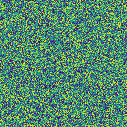

In [4]:
from matplotlib import pyplot as plt
import numpy as np
cmap = plt.get_cmap('viridis')
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplut = np.array(cmaplist)
cmaplut = np.round(cmaplut[:, 0:3]*255).astype(np.uint8)
cmaplut.shape

im = np.random.randint(0,255,size=[127,127]).astype(np.uint8)
im_c = cmaplut[im]
from PIL import Image
Image.fromarray(im_c)


(<Figure size 1040x400 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

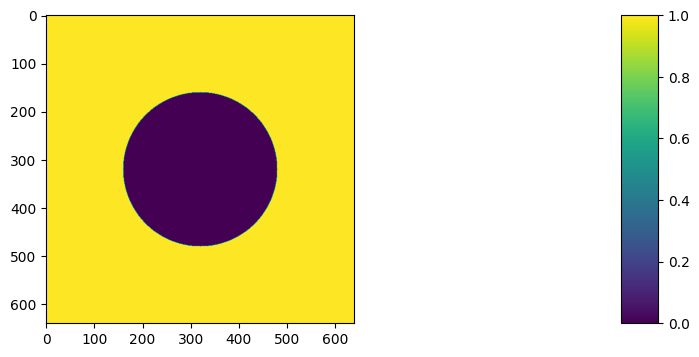

In [7]:
import torch
import matplotlib.pyplot as plt

def perm_roll(im, axis, amount):
  permutation = torch.roll(torch.arange(im.shape[axis], device=im.device), amount, dims=0)
  return torch.index_select(im, axis, permutation)

def shift_left(im):
  tt = perm_roll(im, axis=-2, amount=-(im.shape[-2]+1)//2)
  tt = perm_roll(tt, axis=-1, amount=-(im.shape[-1]+1)//2)
  return tt

def shift_right(im):
  tt = perm_roll(im, axis=-2, amount=(im.shape[-2]+1)//2)
  tt = perm_roll(tt, axis=-1, amount=(im.shape[-1]+1)//2)
  return tt

def circular_aperture(h, w, r=None, low_pass_frequency=False):
    if r is None:
        r = min(h//2, w//2)
    x, y = torch.meshgrid(torch.arange(-h//2, h//2), torch.arange(-w//2, w//2), indexing='ij')
    circle_dist = torch.sqrt(x**2 + y**2)
    if low_pass_frequency:
        circle_aperture = torch.where(circle_dist<r, torch.zeros_like(circle_dist), torch.ones_like(circle_dist))
    else:
        circle_aperture = torch.where(circle_dist<r, torch.ones_like(circle_dist), torch.zeros_like(circle_dist))
    return circle_aperture

def aperture(h, w, condition=None, low_pass_frequency=False):
    """torch.where(condition(circle_dist), torch.ones_like(circle_dist), torch.zeros_like(circle_dist)) """
    x, y = torch.meshgrid(torch.arange(-h//2, h//2), torch.arange(-w//2, w//2), indexing='ij')
    circle_dist = torch.sqrt(x**2 + y**2)
    if low_pass_frequency:
        circle_aperture = torch.where(condition(circle_dist), torch.zeros_like(circle_dist), torch.ones_like(circle_dist))
    else:
        circle_aperture = torch.where(condition(circle_dist), torch.ones_like(circle_dist), torch.zeros_like(circle_dist))
    return circle_aperture


def imshow(tensor, figsize=None, title="", **args):
    figsize = figsize if figsize else (13*0.8,5*0.8)
    
    if type(tensor) is list:
        for idx, el in enumerate(tensor):
            imshow(el, figsize=figsize, title=title, **args)
            plt.suptitle("{} {}".format(idx, title))
        return
    if len(tensor.shape)==4:
        for idx, el in enumerate(torch.squeeze(tensor, dim=1)):
            imshow(el, figsize=figsize, title=title, **args)
            plt.suptitle("{} {}".format(idx, title))
        return
    
    tensor = tensor.detach().cpu() if type(tensor) == torch.Tensor else tensor
    if tensor.dtype == torch.complex64:
        f, ax = plt.subplots(1, 5, figsize=figsize, gridspec_kw={'width_ratios': [46.5,3,1,46.5,3]})
        real_im = ax[0].imshow(tensor.real, **args)
        imag_im = ax[3].imshow(tensor.imag, **args)
        box = ax[1].get_position()
        box.x0 = box.x0 - 0.02
        box.x1 = box.x1 - 0.03
        ax[1].set_position(box)
        box = ax[4].get_position()
        box.x0 = box.x0 - 0.02
        box.x1 = box.x1 - 0.03
        ax[4].set_position(box)
        ax[0].set_title("real");
        ax[3].set_title("imag");
        f.colorbar(real_im, ax[1]);
        f.colorbar(imag_im, ax[4]);
        f.suptitle(title)
        ax[2].remove()
        return f, ax
    else:
        f, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [95,5]}, figsize=figsize)
        im = ax[0].imshow(tensor, **args)
        f.colorbar(im, ax[1])
        f.suptitle(title)
        return f, ax

h, w = 640, 640
r = min(h, w)//4
imshow(aperture(h=h, w=w, condition=lambda circle_dist: circle_dist>r, low_pass_frequency=False))

In [73]:
aperture(h=h, w=w, condition=lambda circle_dist: circle_dist>r, is_inv=True).sum()

tensor(12453.)

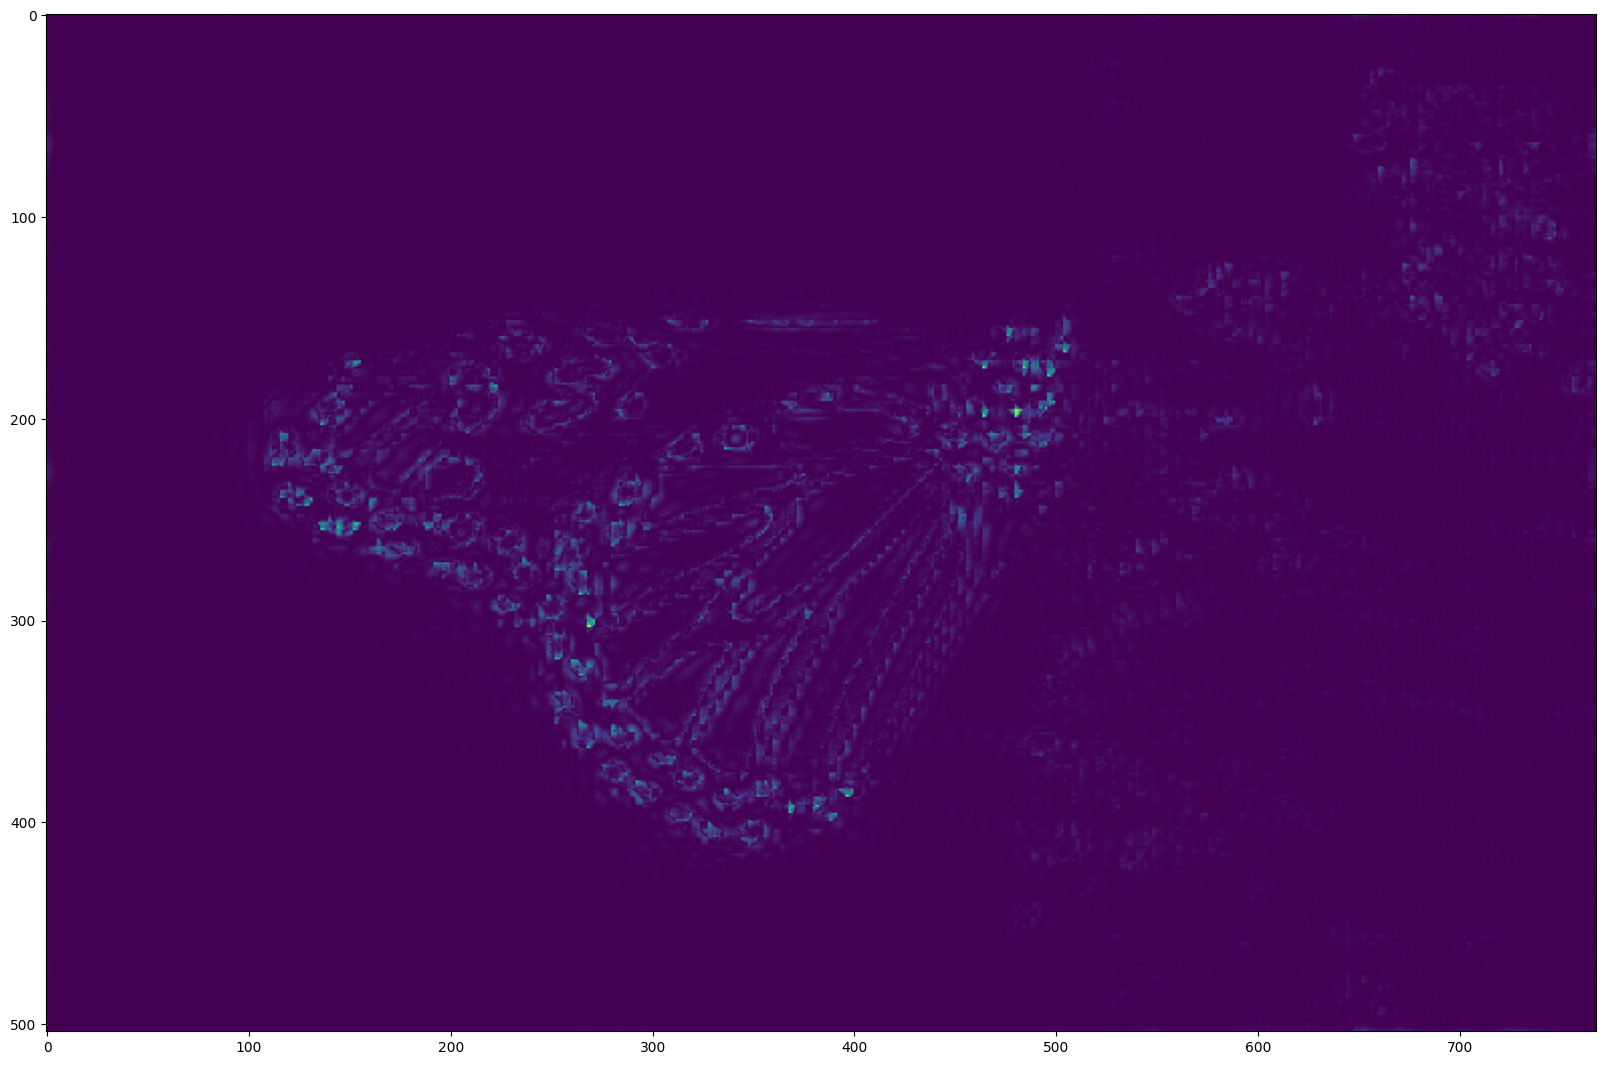

In [11]:
from torch.fft import rfft2, irfft2, fft2, ifft2
i = 206
image = np.array(Image.open("./models/HDBHNet_L_DIV2K_x4/val/Set14/monarch_400000.png").convert("YCbCr").getchannel(0))#[i:i+48,i:i+48]
h,w = image.shape
r = min(h, w)//12
ap = aperture(h=h, w=w, condition=lambda circle_dist: circle_dist>r, low_pass_frequency=False)
image = torch.tensor(image)
# image = ifft(fft2(image) * aperture(h=h, w=w, condition=lambda circle_dist: circle_dist>r, is_inv=False))
image = ifft2(shift_right(shift_right(fft2(image))*ap)).real**2
f,ax=plt.subplots(1,1,figsize=[20,20])
ax.imshow(image)

(<Figure size 2500x2500 with 4 Axes>,
 array([<Axes: title={'center': 'real'}>, <Axes: >, <Axes: >,
        <Axes: title={'center': 'imag'}>, <Axes: >], dtype=object))

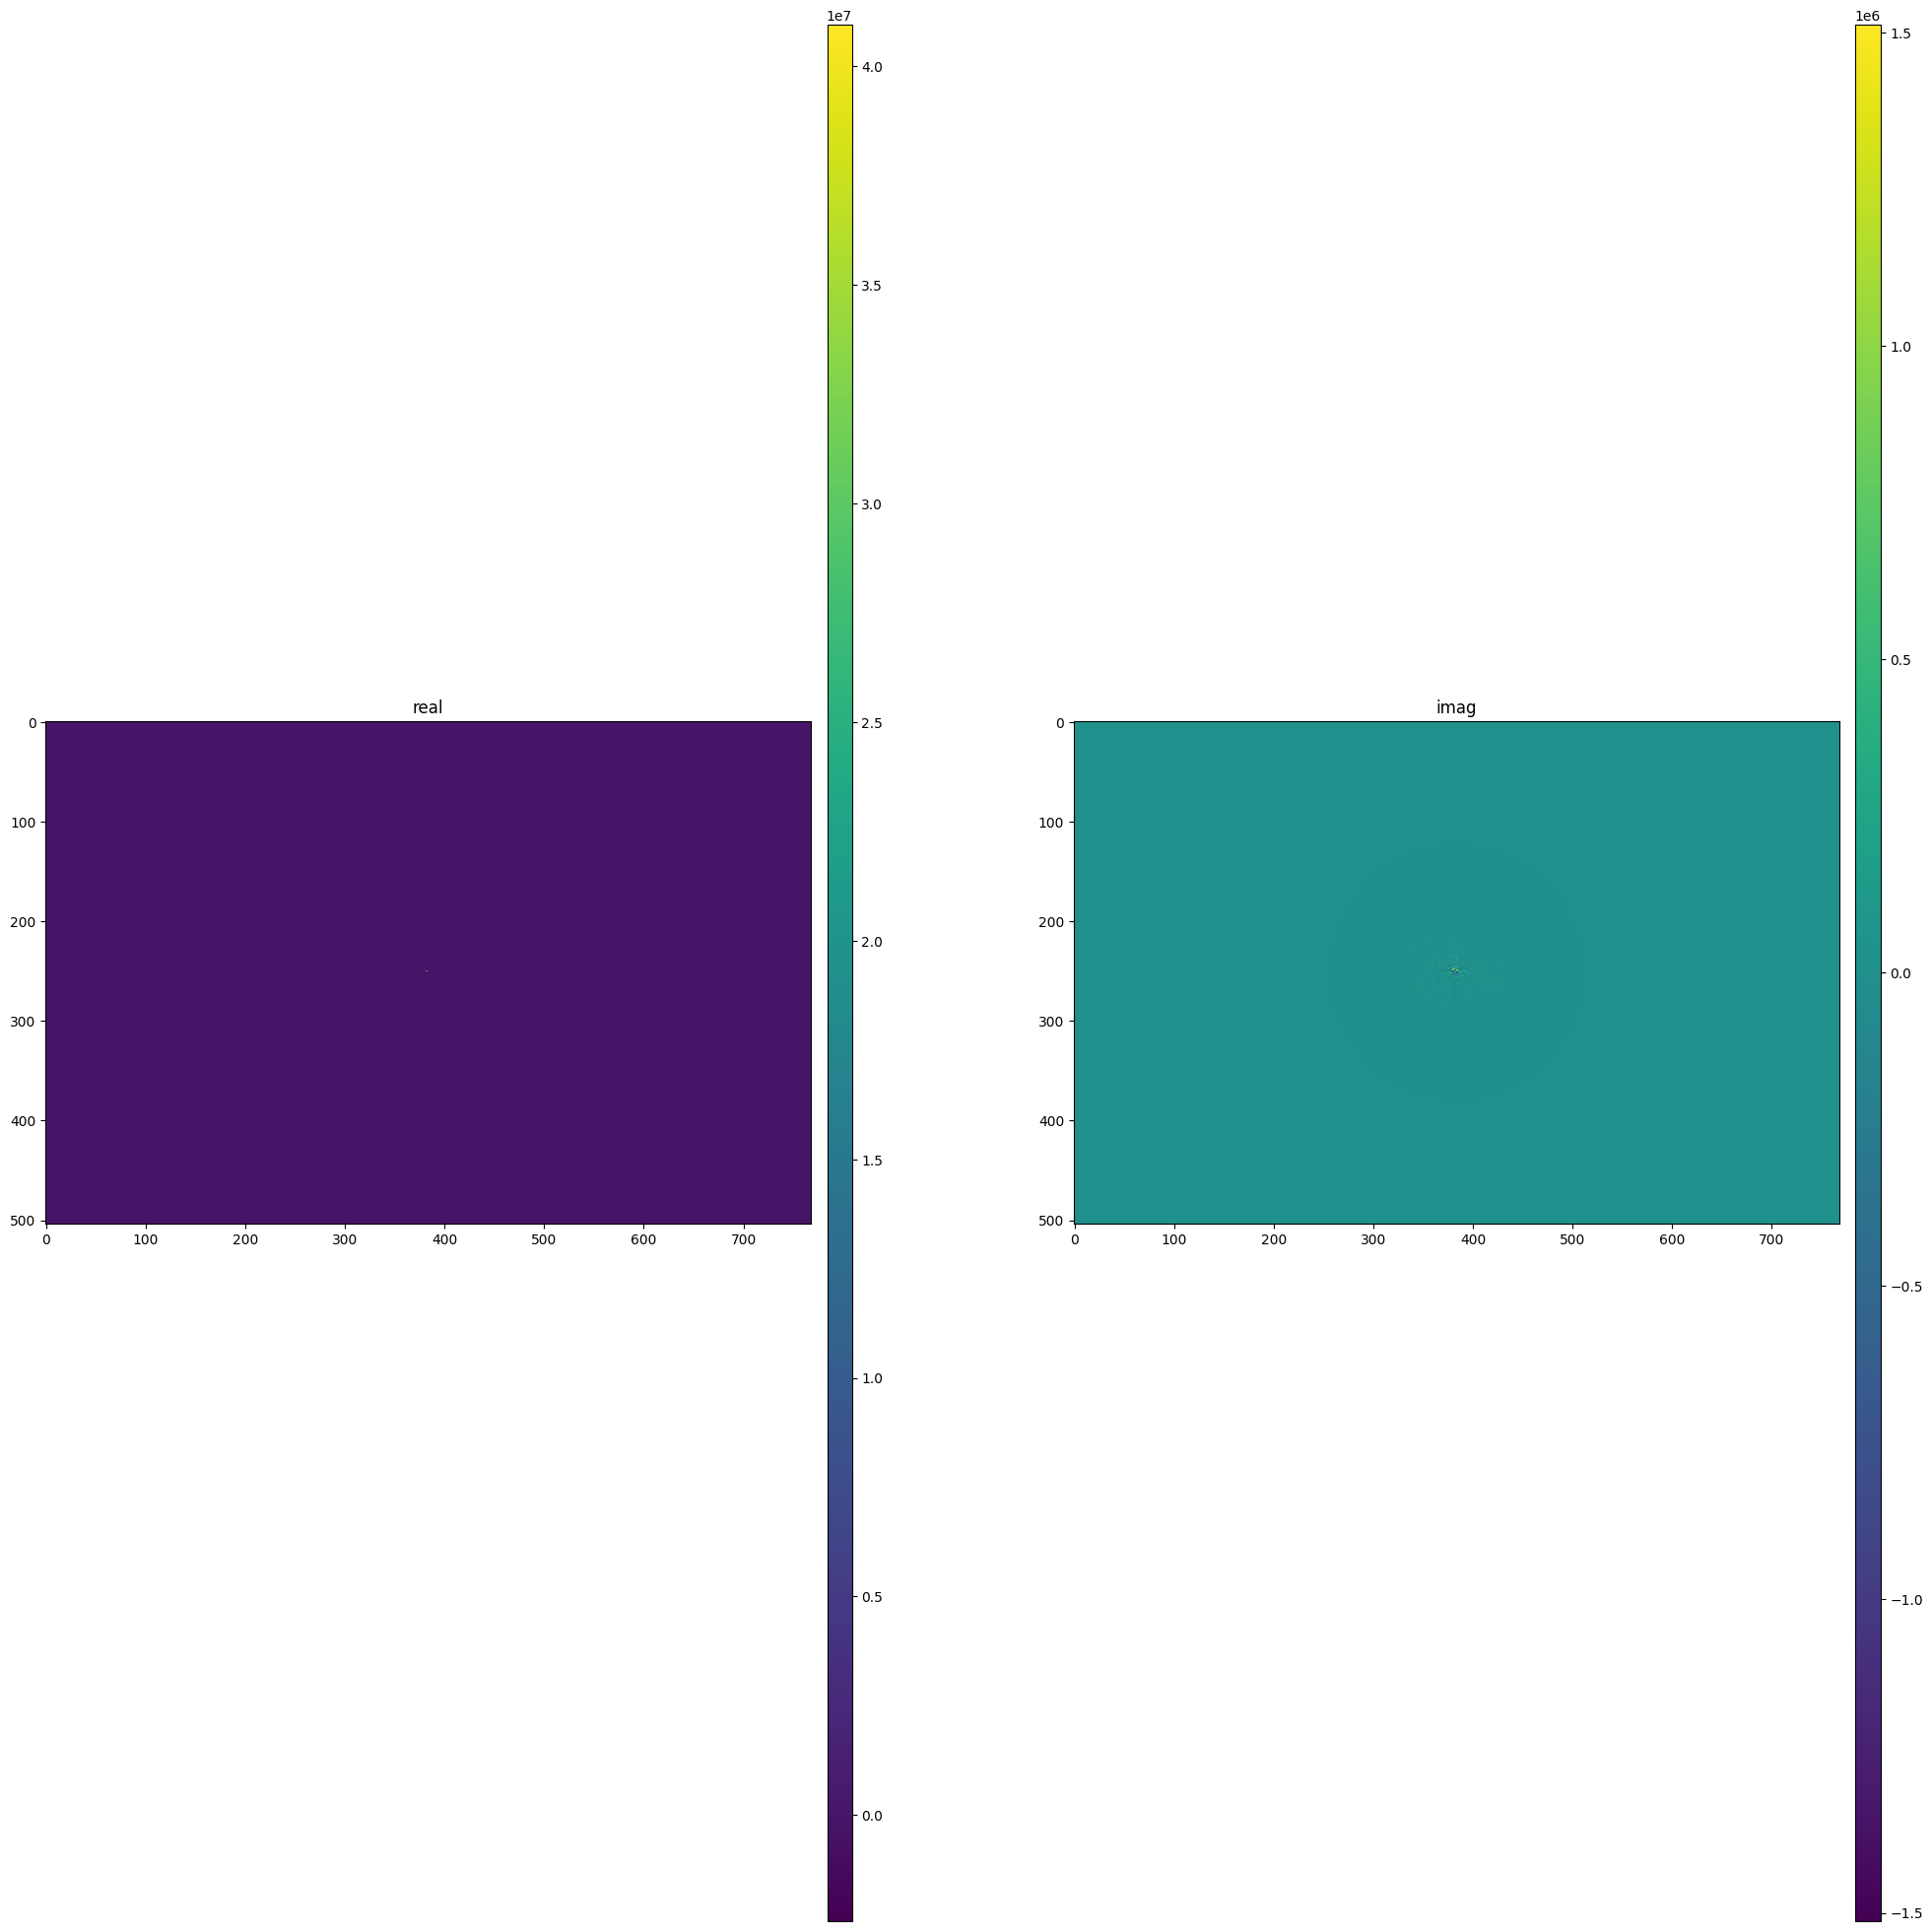

In [54]:
imshow(shift_left(fft2(image))*aperture(h=h, w=w, condition=lambda circle_dist: circle_dist>r, is_inv=True), figsize=[25,25])

In [43]:
aperture(h=h, w=w, condition=lambda circle_dist: circle_dist>r, is_inv=False).shape, fft2(image).shape

(torch.Size([504, 768]), torch.Size([504, 768]))

In [73]:
import torch
from torch import nn

def select_index_1dlut_linear(index, lut):
    b, hw, c = index.shape
    L = lut.shape[0]
    Q = 256/(L-1)
    msbA = torch.floor_divide(index, Q).type(torch.int64)
    msbB = msbA + 1
    msbA = msbA.flatten() 
    msbB = msbB.flatten() 
    lsb = index % Q
    outA = lut[msbA].reshape((b, hw, c))
    outB = lut[msbB].reshape((b, hw, c))
    lsb_coef = (lsb / Q).reshape((b, hw, c))
    out = outA + lsb_coef*(outB-outA) 
    return out

class ChebyKANLut(nn.Module):
    def __init__(self, in_features, out_features, quantization_interval=16):
        super(ChebyKANLut, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.lut = nn.Parameter(
            torch.randint(0, 255, size=(in_features, out_features, 256//quantization_interval+1)).type(torch.float32)
        )

    def forward(self, x):
        b,w,c = x.shape
        out = torch.zeros([b, w, self.out_features], dtype=x.dtype, device=x.device)
        for j in range(self.out_features):
          for i in range(self.in_features):
            out[:,:,j:(j+1)] += select_index_1dlut_linear(x[:,:,i:(i+1)], self.lut[i,j])
        return out

    def __repr__(self):
        return f"{self.__class__.__name__}\n  lut size: {self.lut.shape}"

In [77]:
m = ChebyKANLut(3,16)
inp = torch.rand((1,20,3))
m, inp.shape

(ChebyKANLut
   lut size: torch.Size([3, 16, 17]),
 torch.Size([1, 20, 3]))

In [79]:
m(inp)

tensor([[[463.2381, 376.8301, 114.3476, 271.9085, 490.1937, 582.6370, 409.1758,
          400.9393, 427.7816, 196.5997, 351.1473, 200.7222, 495.7486, 278.1267,
          287.9622, 235.4593],
         [465.8668, 380.2632, 114.4513, 271.2806, 485.8594, 585.0460, 410.2136,
          398.2844, 426.6433, 195.5223, 350.1196, 193.7059, 497.1382, 282.1424,
          289.3316, 234.4068],
         [462.1194, 379.0745, 109.0163, 277.1783, 493.5525, 591.0010, 410.6595,
          401.0636, 431.8007, 190.6285, 352.5268, 194.8572, 495.7587, 284.5918,
          289.6667, 228.1012],
         [464.3282, 381.8761, 114.0047, 275.6982, 483.6394, 587.6432, 412.8979,
          397.2225, 427.2900, 193.6885, 350.6945, 192.2639, 495.0728, 288.2772,
          290.2244, 232.0959],
         [466.6015, 378.4167, 108.2795, 269.1100, 496.8093, 589.6433, 406.0382,
          401.7880, 431.0631, 191.9368, 351.1408, 191.8252, 500.9969, 276.0202,
          289.1382, 229.9864],
         [460.9582, 380.3485, 110.4867, 280.2

In [1]:
import torch
from torch import nn
import numpy as np
from src.common import lut
from torch.utils.data import Dataset, DataLoader

In [2]:
class ChebyKANLayer(nn.Module):
    """
    https://github.com/SynodicMonth/ChebyKAN/blob/main/ChebyKANLayer.py
    """
    def __init__(self, in_features, out_features, degree=8, input_max_value=255, output_max_value=255):
        super(ChebyKANLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.degree = degree

        self.cheby_coeffs = nn.Parameter(torch.empty(in_features, out_features, degree + 1))
        nn.init.normal_(self.cheby_coeffs, mean=0.0, std=1 / (in_features * (degree + 1)))
        self.register_buffer("arange", torch.arange(0, degree + 1, 1))

        self.in_bias = self.in_scale = input_max_value/2
        self.out_bias = self.out_scale = output_max_value/2

    def forward_all_to_all(self, x):
        # Since Chebyshev polynomial is defined in [-1, 1]
        # We need to normalize x to [-1, 1] using tanh
        b, hw, c = x.shape
        assert c == self.in_features, f"Input features count={c} is not equal to specified for this layer count={self.in_features}."
        x = (x-self.in_bias)/self.in_scale
        x = torch.tanh(x)

        # View and repeat input degree + 1 times
        x = x.view((b, hw, self.in_features, 1)).expand(
            -1, -1, -1, self.degree + 1
        )  # shape = (batch_size, inputdim, self.degree + 1)
        # Apply acos
        x = x.acos()
        # Multiply by arange [0 .. degree]
        x *= self.arange
        # Apply cos
        x = x.cos()
        # Compute the Chebyshev interpolation
        y = torch.einsum(
            "btid,iod->btio", x, self.cheby_coeffs
        )  # shape = (batch_size, hw, outdim)
        
        y = y*self.out_scale + self.out_bias
        y = y.view(b, hw, self.in_features, self.out_features)
        y = y.clamp(0,255)
        return y

    def forward(self, x):
        # Since Chebyshev polynomial is defined in [-1, 1]
        # We need to normalize x to [-1, 1] using tanh
        b, hw, c = x.shape
        assert c == self.in_features, f"Input features count={c} is not equal to specified for this layer count={self.in_features}."
        x = (x-self.in_bias)/self.in_scale
        x = torch.tanh(x)

        # View and repeat input degree + 1 times
        x = x.view((b, hw, self.in_features, 1)).expand(
            -1, -1, -1, self.degree + 1
        )  # shape = (batch_size, inputdim, self.degree + 1)
        # Apply acos
        x = x.acos()
        # Multiply by arange [0 .. degree]
        x *= self.arange
        # Apply cos
        x = x.cos()
        # Compute the Chebyshev interpolation
        y = torch.einsum(
            "btid,iod->bto", x, self.cheby_coeffs
        )  # shape = (batch_size, hw, outdim)
        
        y = y*self.out_scale + self.out_bias
        y = y.view(b, hw, self.out_features)
        y = y.clamp(0,255)
        return y

    def get_lut_model(self, quantization_interval=16, batch_size=2**10):
        bucket_count = 256//quantization_interval  
        in_features = self.in_features
        out_features = self.out_features  
        domain_values = torch.cat([torch.arange(0, 256, quantization_interval, dtype=torch.uint8), torch.tensor([255])])
        inputs = domain_values.type(torch.float32).to(self.cheby_coeffs.device)
        lut = np.full((in_features, out_features, bucket_count+1), dtype=np.uint8, fill_value=255)

        qmodel = ChebyKANLut(in_features=self.in_features, out_features=self.out_features, quantization_interval=quantization_interval)
        with torch.no_grad():
            for d in range(len(domain_values)):
                lut[:,:,d] = self.forward_all_to_all(inputs[d].view(1,1,1).expand(1,1,in_features)).cpu().numpy().astype(np.uint8).squeeze()
        qmodel.lut = nn.Parameter(torch.tensor(lut).type(torch.float32))
        return qmodel
    
    def __repr__(self):
        return (f"{self.__class__.__name__}\n" 
                f"cheby coefs size: {self.cheby_coeffs.shape}\n"
                f"in/out bias, scale: {self.in_bias}, {self.in_scale} / {self.out_bias}, {self.out_scale}" )

from src.common.lut import select_index_1dlut_linear

class ChebyKANLut(nn.Module):
    def __init__(self, in_features, out_features, quantization_interval=16):
        super(ChebyKANLut, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.lut = nn.Parameter(
            torch.randint(0, 255, size=(in_features, out_features, 256//quantization_interval+1)).type(torch.float32)
        )

    def forward(self, x):
        out = self.forward_all_to_all(x).sum(dim=2)
        out = out*127.5 + 127.5
        return out.clamp(0,255)

    def forward_all_to_all(self, x):
        b,w,c = x.shape
        out = torch.zeros([b, w, self.in_features, self.out_features], dtype=x.dtype, device=x.device)
        for j in range(self.out_features):
          for i in range(self.in_features):
            out[:,:, i, j:(j+1)] = (lut.select_index_1dlut_linear(x[:,:,i:(i+1)], self.lut[i,j]) - 127.5)/127.5
        return out 

    def __repr__(self):
        return f"{self.__class__.__name__}\n  lut size: {self.lut.shape}"

In [3]:
mm = ChebyKANLayer(3, 2)
mm

ChebyKANLayer
cheby coefs size: torch.Size([3, 2, 9])
in/out bias, scale: 127.5, 127.5 / 127.5, 127.5

In [4]:
test_inputs = torch.rand(1,1,3)*240
mm.forward_all_to_all(torch.rand(1,1,3)).shape

torch.Size([1, 1, 3, 2])

In [5]:
mm = ChebyKANLayer(3, 2)
qmodel = mm.get_lut_model(quantization_interval=1)
a,b,c,d = mm.forward_all_to_all(test_inputs), qmodel.forward_all_to_all(test_inputs), mm(test_inputs), qmodel(test_inputs)
a,b,c,d

(tensor([[[[122.7208, 105.1765],
           [130.7248, 115.0563],
           [126.7512, 143.1962]]]], grad_fn=<ClampBackward1>),
 tensor([[[[-0.0431, -0.1765],
           [ 0.0196, -0.1001],
           [-0.0118,  0.1216]]]], grad_fn=<CopySlices>),
 tensor([[[125.1967, 108.4290]]], grad_fn=<ClampBackward1>),
 tensor([[[123.0000, 107.7358]]], grad_fn=<ClampBackward1>))

In [39]:
((a-127.5)/127.5).sum(dim=2), ((b-127.5)/127.5).sum(dim=2)

(tensor([[[0.0801, 0.0629]]], grad_fn=<SumBackward1>),
 tensor([[[0.0712, 0.0510]]], grad_fn=<SumBackward1>))

In [13]:
import torch
import numpy as np 
from pathlib import Path
import inspect, sys

sys.path.append('/wd/lut_reproduce/src/')
from common.base import SRBase
from models import AVAILABLE_MODELS

def LoadCheckpoint(model_path):
    model_path = Path(model_path).absolute()
    if model_path.exists():
        model_container = torch.load(model_path)
        init_arg_names = list(inspect.signature(AVAILABLE_MODELS[model_container['model']]).parameters.keys())
        model = AVAILABLE_MODELS[model_container['model']](**{k:model_container[k] for k in init_arg_names})
        model.load_state_dict(model_container['state_dict'], strict=True)
        return model
    else:
        raise Exception(f"Path {model_path} does not exist.")

m1 = LoadCheckpoint("/wd/lut_reproduce/experiments/ChebyKANNet_RGB_DIV2K_x4/checkpoints/ChebyKANNet_10000.pth")
m2 = LoadCheckpoint("/wd/lut_reproduce/experiments/ChebyKANNet_RGB_DIV2K_x4/checkpoints/ChebyKANLut_0.pth")
m1, m2

0 out: 255 255
1 out: 124 255
2 out: 124 255
3 out: 124 255
4 out: 124 255
5 out: 124 255
6 out: 124 255
7 out: 124 255
8 out: 124 255
9 out: 124 255
10 out: 124 255
11 out: 124 255
12 out: 124 255
13 out: 124 255
14 out: 124 255
15 out: 124 255
16 out: 124 255
0 out: 255 255
1 out: 120 255
2 out: 120 255
3 out: 120 255
4 out: 120 255
5 out: 120 255
6 out: 120 255
7 out: 120 255
8 out: 120 255
9 out: 120 255
10 out: 120 255
11 out: 120 255
12 out: 120 255
13 out: 120 255
14 out: 120 255
15 out: 120 255
16 out: 120 255
0 out: 255 255
1 out: 119 255
2 out: 119 255
3 out: 119 255
4 out: 119 255
5 out: 119 255
6 out: 119 255
7 out: 119 255
8 out: 119 255
9 out: 119 255
10 out: 119 255
11 out: 119 255
12 out: 119 255
13 out: 119 255
14 out: 119 255
15 out: 119 255
16 out: 119 255
0 out: 255 255
1 out: 120 255
2 out: 120 255
3 out: 120 255
4 out: 120 255
5 out: 120 255
6 out: 120 255
7 out: 120 255
8 out: 120 255
9 out: 120 255
10 out: 120 255
11 out: 120 255
12 out: 120 255
13 out: 120 255


(ChebyKANNet(
   (stage1_S): UpscaleBlock(
     (stage): ChebyKANUpscaleBlockNet(
       (kan_layers): ModuleList(
         (0): ChebyKANLayer
         cheby coefs size: torch.Size([49, 16, 9])
         in/out bias, scale: 127.5, 127.5 / 127.5, 127.5
         (1-3): 3 x ChebyKANLayer
         cheby coefs size: torch.Size([16, 16, 9])
         in/out bias, scale: 127.5, 127.5 / 127.5, 127.5
       )
     )
   )
 ),
 ChebyKANLut(
   (stage1_S): UpscaleBlock(
     (stage): ChebyKANUpscaleBlockLut
     lut size: torch.Size([49, 16, 17])
     lut size: torch.Size([16, 16, 17])
     lut size: torch.Size([16, 16, 17])
     lut size: torch.Size([16, 16, 17])
   )
 ))

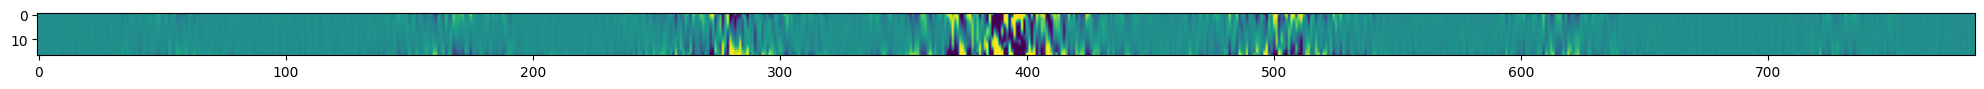

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)
a = m2.stage1_S.stage.lut_kan_layers[0].lut.detach()
a = a.view(a.shape[0]*a.shape[1], a.shape[2]).permute(1,0)
plt.imshow(a)

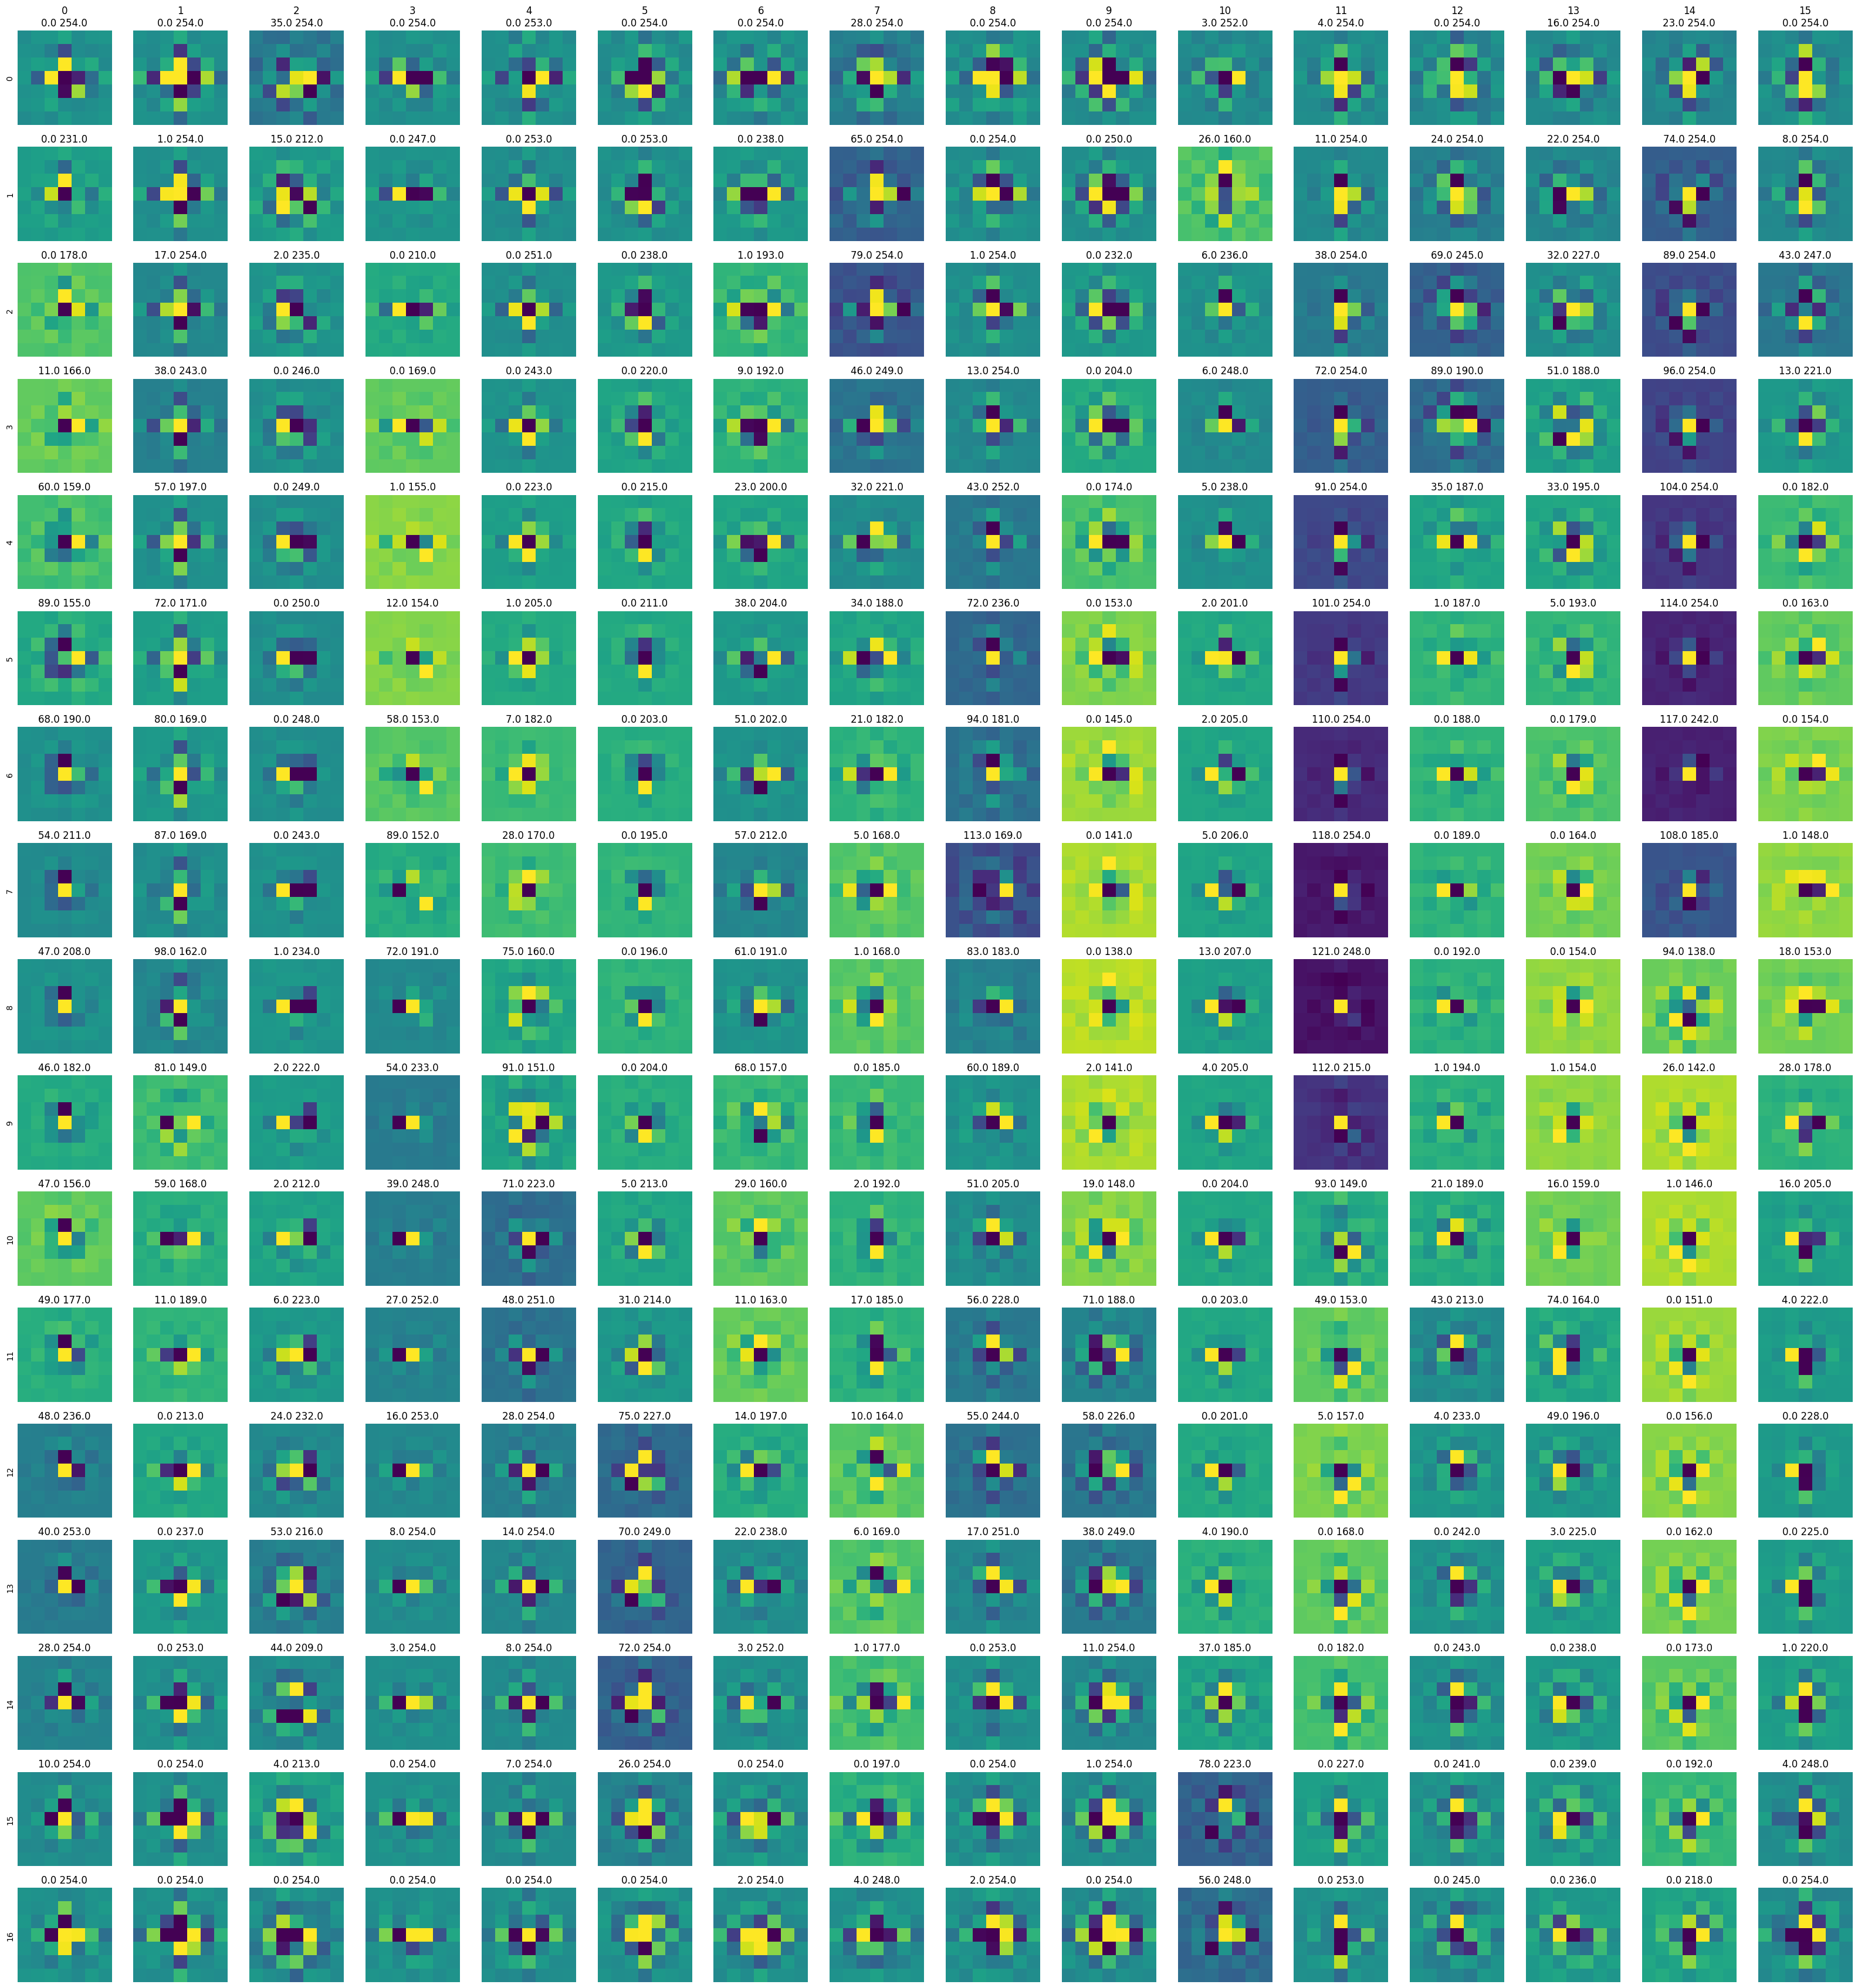

In [15]:
a = m2.stage1_S.stage.lut_kan_layers[0].lut.detach()
a = a.view(7,7, a.shape[1], a.shape[2])
f, ax = plt.subplots(a.shape[3], 16, figsize=(16*2,a.shape[3]*2))

for i in range(16):
    ax[0,i].imshow(a[:,:,i,0])
    ax[0,i].set_title(f"{i}\n{a[:,:,i,0].min()} {a[:,:,i,0].max()}")
    ax[0,0].set_ylabel(0)
    ax[0,i].xaxis.set_ticks([])
    ax[0,i].yaxis.set_ticks([])
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['right'].set_visible(False)
    ax[0,i].spines['bottom'].set_visible(False)
    ax[0,i].spines['left'].set_visible(False)

for j in range(1, a.shape[3]):
    for i in range(16):
        ax[j,i].imshow(a[:,:,i,j])
        ax[j,i].set_title(f"{a[:,:,i,j].min()} {a[:,:,i,j].max()}")
        ax[j,i].xaxis.set_ticks([])
        ax[j,i].yaxis.set_ticks([])
        ax[j,i].spines['top'].set_visible(False)
        ax[j,i].spines['right'].set_visible(False)
        ax[j,i].spines['bottom'].set_visible(False)
        ax[j,i].spines['left'].set_visible(False)
    ax[j,0].set_ylabel(j)
    ax[j,0].xaxis.set_ticks([])
    ax[j,0].yaxis.set_ticks([])


f.tight_layout()
f.savefig("layer0_kan_response.png")

In [3]:
test_inputs = torch.rand(1,1,1,1)*0
m1(test_inputs), m2(test_inputs)

tensor(0., grad_fn=<MinBackward1>) tensor(255., grad_fn=<MaxBackward1>)
tensor(40.1250, grad_fn=<MinBackward1>) tensor(255., grad_fn=<MaxBackward1>)
tensor(15.0820, grad_fn=<MinBackward1>) tensor(255., grad_fn=<MaxBackward1>)
tensor(28.8976, grad_fn=<MinBackward1>) tensor(113.0898, grad_fn=<MaxBackward1>)


(tensor([[[[3.2703, 0.8327, 0.0000, 0.0000],
           [2.3942, 0.2477, 0.0000, 0.0000],
           [2.1219, 0.4743, 0.0000, 0.0000],
           [1.0222, 0.0000, 0.0000, 0.0000]]]], grad_fn=<ViewBackward0>),
 tensor([[[[ 73.1828,  52.9904,  58.2204,  82.1313],
           [ 70.1781,  47.5996,  46.5503,  69.2304],
           [ 86.4780,  60.9516,  45.3540,  44.3884],
           [113.0898,  83.6535,  48.8901,  28.8976]]]], grad_fn=<ViewBackward0>))

In [4]:
from common.transferer import TRANSFERER
m3 = TRANSFERER.transfer(m1, quantization_interval=16, batch_size=1)

In [5]:
m3(test_inputs)

tensor(0.) tensor(0.)
tensor(123.8163, grad_fn=<MinBackward1>) tensor(130.0612, grad_fn=<MaxBackward1>)


tensor([[[[129.7551, 123.9184, 123.8163, 130.0612],
          [123.9388, 126.4898, 126.4694, 124.4082],
          [124.0612, 126.5918, 126.5510, 124.1429],
          [130.0612, 123.8571, 123.8163, 129.8163]]]], grad_fn=<ViewBackward0>)

In [6]:
test_inputs2 = torch.rand(1,1,49)*0+240
m1.stage1_S.stage(test_inputs2), m3.stage1_S.stage(test_inputs2)

tensor(240.) tensor(240.)
tensor(240.7835, grad_fn=<MinBackward1>) tensor(241.0111, grad_fn=<MaxBackward1>)


(tensor([[[240.8836, 240.9921, 240.9105, 240.8179, 240.9391, 241.0111, 240.9476,
           240.8635, 240.8910, 240.9602, 240.9307, 240.8593, 240.8460, 240.9522,
           240.8667, 240.7835]]], grad_fn=<ClampBackward1>),
 tensor([[[125.4082, 128.1429, 128.1020, 125.0816, 128.0816, 120.6327, 120.3673,
           128.2449, 128.3265, 120.4694, 120.5714, 127.7959, 124.9592, 128.4898,
           128.2857, 125.3265]]], grad_fn=<ClampBackward1>))

In [7]:
hh = m1.stage1_S.stage.kan_layers[0].forward_all_to_all(test_inputs2) - m3.stage1_S.stage.lut_kan_layers[0].forward_all_to_all(test_inputs2)
hh

tensor([[[[0.6722, 0.1377, 0.4164, 0.1504, 0.1376, 0.7989, 0.6800, 0.6141,
           0.4306, 0.7024, 0.9200, 0.4104, 0.2442, 0.5429, 0.4224, 0.7128],
          [0.4108, 0.4489, 0.9809, 0.2111, 0.1657, 0.5533, 0.1441, 0.7416,
           0.7417, 0.3129, 0.9356, 0.6075, 0.0329, 0.8363, 0.9527, 0.1054],
          [0.4969, 0.6650, 0.0000, 0.4890, 0.2263, 0.8471, 0.0000, 0.0000,
           0.2930, 0.0000, 0.0000, 0.0000, 0.3835, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.6993, 0.0000, 0.0000, 0.0461],
          [0.1760, 0.0000, 0.2333, 0.2441, 0.0000, 0.0000, 0.2091, 0.1063,
           0.0000, 0.0000, 0.0000, 0.7203, 0.0000, 0.0000, 0.0000, 0.8384],
          [0.5135, 0.0329, 0.3967, 0.3820, 0.6470, 0.3009, 0.0617, 0.2916,
           0.7006, 0.9806, 0.5691, 0.5479, 0.9729, 0.1562, 0.4560, 0.3695],
          [0.5022, 0.1042, 0.9647, 0.3208, 0.2266, 0.9884, 0.3845, 0.5333,
           0.3925, 

In [12]:
(m1.stage1_S.stage.kan_layers[0].forward_all_to_all(test_inputs2)-128).sum(dim=2)+128

tensor([[[  14.4436,  146.0529,  144.9745,   -1.3100,  145.1672, -220.2434,
          -234.9705,  152.4140,  159.4297, -229.3029, -223.1717,  129.3506,
            -8.2089,  162.5913,  152.4927,   11.4619]]],
       grad_fn=<AddBackward0>)

In [8]:
m3.stage1_S.stage.lut_kan_layers[0].forward_all_to_all(test_inputs2).sum(dim=2) / 49

tensor([[[125.4082, 128.1429, 128.1020, 125.0816, 128.0816, 120.6327, 120.3673,
          128.2449, 128.3265, 120.4694, 120.5714, 127.7959, 124.9592, 128.4898,
          128.2857, 125.3265]]], grad_fn=<DivBackward0>)

In [21]:
def select_index_1dlut_linear(index, lut):
    b, hw, c = index.shape
    L = lut.shape[0]
    Q = 256/(L-1)
    msbA = torch.floor_divide(index, Q).type(torch.int64)
    msbB = msbA + 1
    msbA = msbA.flatten() 
    msbB = msbB.flatten() 
    lsb = index % Q
    outA = lut[msbA].reshape((b, hw, c))
    outB = lut[msbB].reshape((b, hw, c))
    lsb_coef = (lsb / Q).reshape((b, hw, c))
    out = outA + lsb_coef*(outB-outA) 
    return out

lut = torch.arange(0, 257, 16)    
index = torch.arange(0, 255, 1)
lut, index

(tensor([  0,  16,  32,  48,  64,  80,  96, 112, 128, 144, 160, 176, 192, 208,
         224, 240, 256]),
 tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 15

In [22]:
select_index_1dlut_linear(index.view(1,1,-1), lut).squeeze()

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14